## Ejercicio 1 [2.1 del libro]:

Para los datos de Johnson & Johnson (`jj`), considerados como serie $y_t$, considere la transformación $x_t = \log(y_t)$. Dicha transformación muestra los incrementos relativos o porcentuales (al pasar a logaritmo).

1. Ajustar un modelo de la forma:
$$x_t = \beta t + \sum_{i=1}^4 \alpha_i Q_i(t) + w_t$$
siendo $Q_i$ una función que vale $1$ si se está en el trimestre $i$ y $0$ si no.

2. Graficar los datos y superponer los datos ajustados.

3. Calcular los residuos y evaluar el ajuste.

In [1]:
library(astsa)
options(repr.plot.width=12, repr.plot.height=7)
t = time(jj) -1960 # para centrarlo en el año 0
x = log(jj)

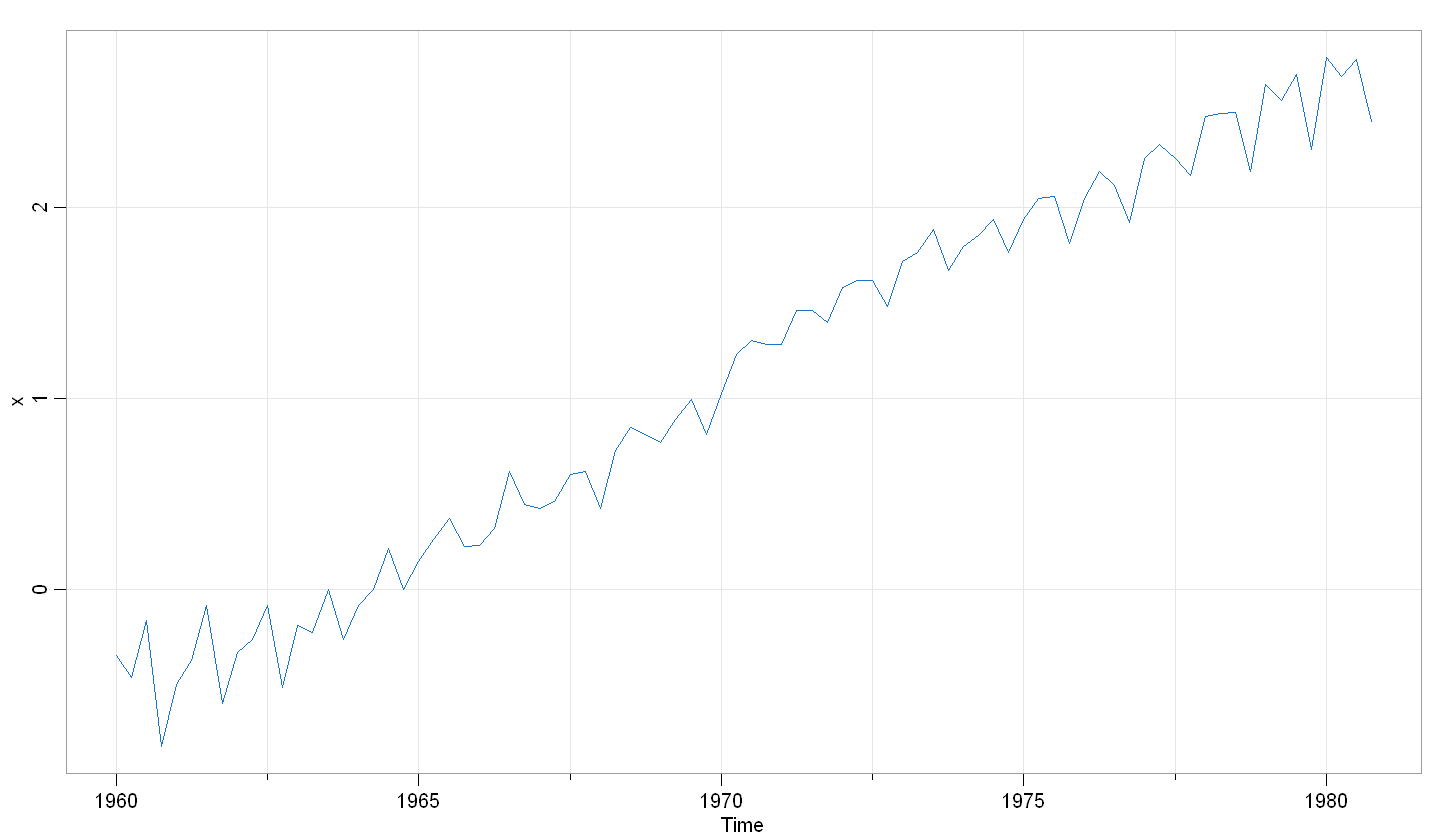

In [2]:
tsplot(x, col=4)

In [3]:
q = factor(cycle(jj))#sigue el ciclo y asigna una variable explicativa de cada trimestre
fit = lm(x~0+t+q) #si le pongo el intercept veo la variacion de los trimestres contra el intercept
#si se lo saco le paso ese valor a cada trimestre.
summary(fit)


Call:
lm(formula = x ~ 0 + t + q)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.29318 -0.09062 -0.01180  0.08460  0.27644 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
t   0.167172   0.002259   74.00   <2e-16 ***
q1 -0.618928   0.035481  -17.44   <2e-16 ***
q2 -0.590806   0.035843  -16.48   <2e-16 ***
q3 -0.520697   0.036210  -14.38   <2e-16 ***
q4 -0.789455   0.036583  -21.58   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1254 on 79 degrees of freedom
Multiple R-squared:  0.9935,	Adjusted R-squared:  0.9931 
F-statistic:  2407 on 5 and 79 DF,  p-value: < 2.2e-16


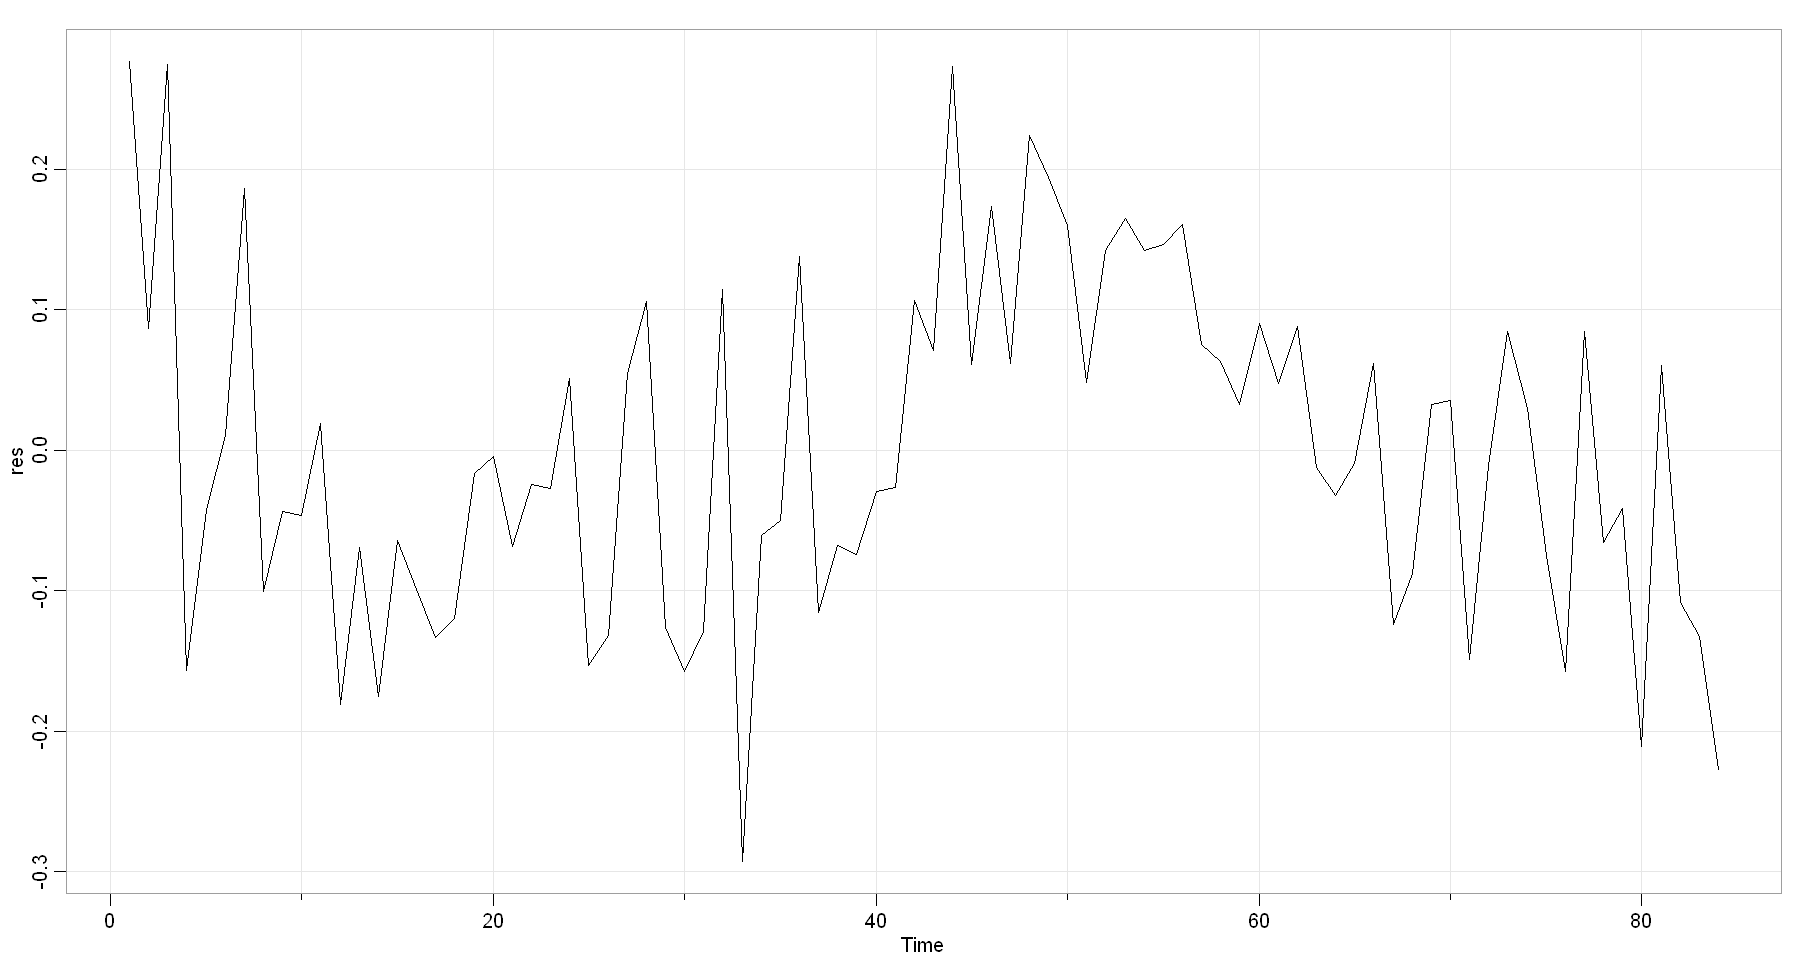

In [4]:
options(repr.plot.width=15, repr.plot.height=8)
res = residuals(fit)

tsplot(res)

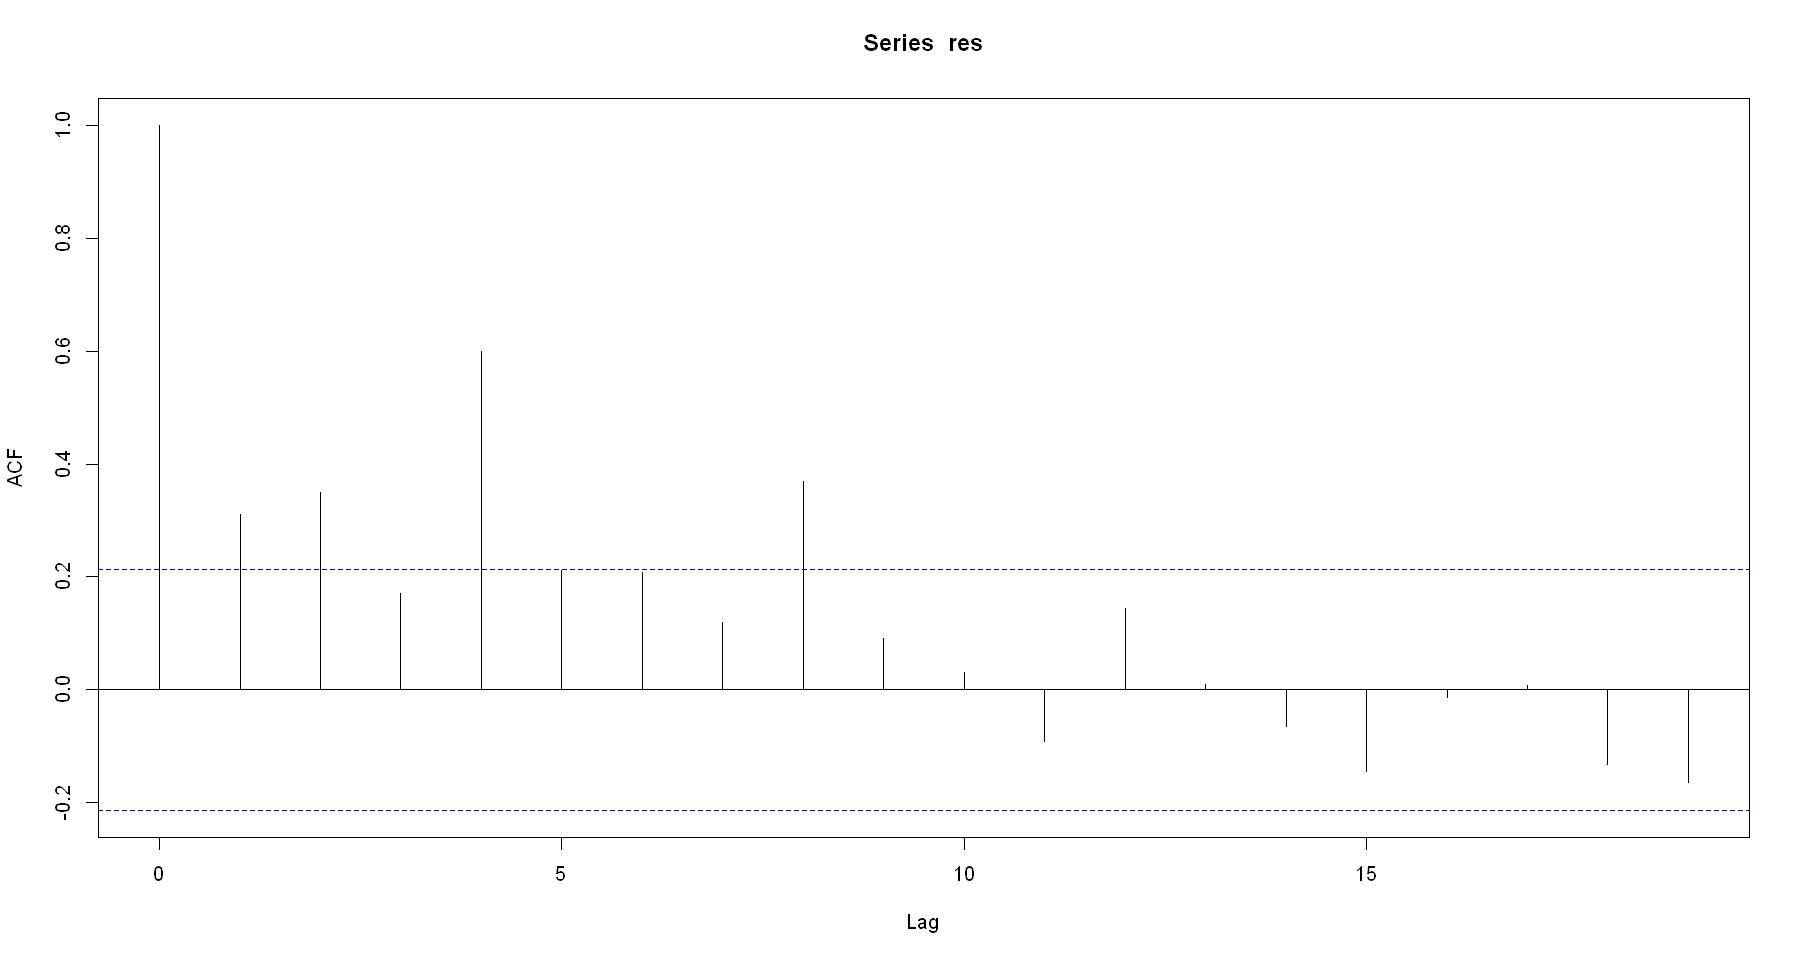

In [5]:
acf(res)

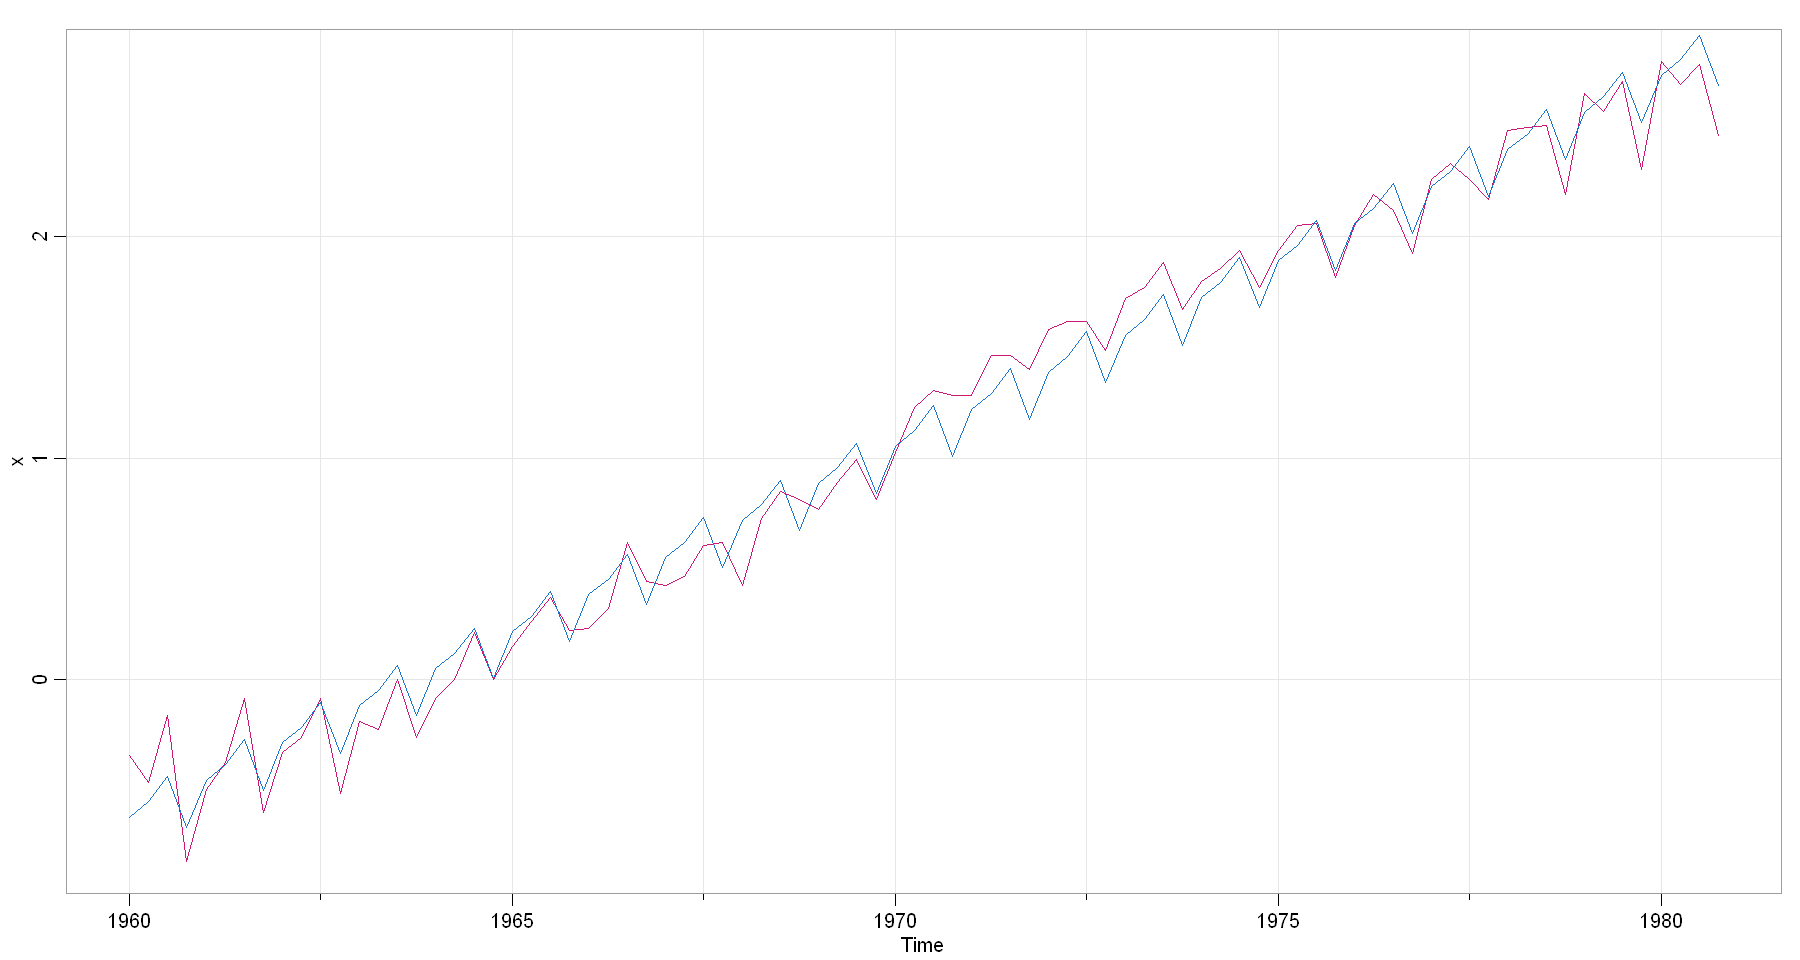

In [6]:
xhat = fitted(fit)
xhat = ts(xhat,start=1960, frequency = 4)

tsplot(x, col=6)
lines(xhat, col=4)

El modelo ajusta un 99% mejor que solo aplicar los logaritmos.

## Ejercicio 2 (ajuste de una señal):

Considere la señal generada más abajo, que consiste en una componente periódica más ruido. 

1. Ajuste un modelo de la forma:
$$x_t = \beta_1 + \beta_2 \cos(2\pi t) + \beta_3 \sin(2\pi t).$$

2. Ajuste un modelo de la forma:
$$x_t = \beta_1 + \beta_2 \cos(2\pi t) + \beta_3 \sin(2\pi t) + \beta_4 \cos(2\pi 2t) + \beta_5 \sin(2\pi 2t).$$
¿Qué captura este segundo modelo?

3. Compare los residuos y los ajustes en cada uno.

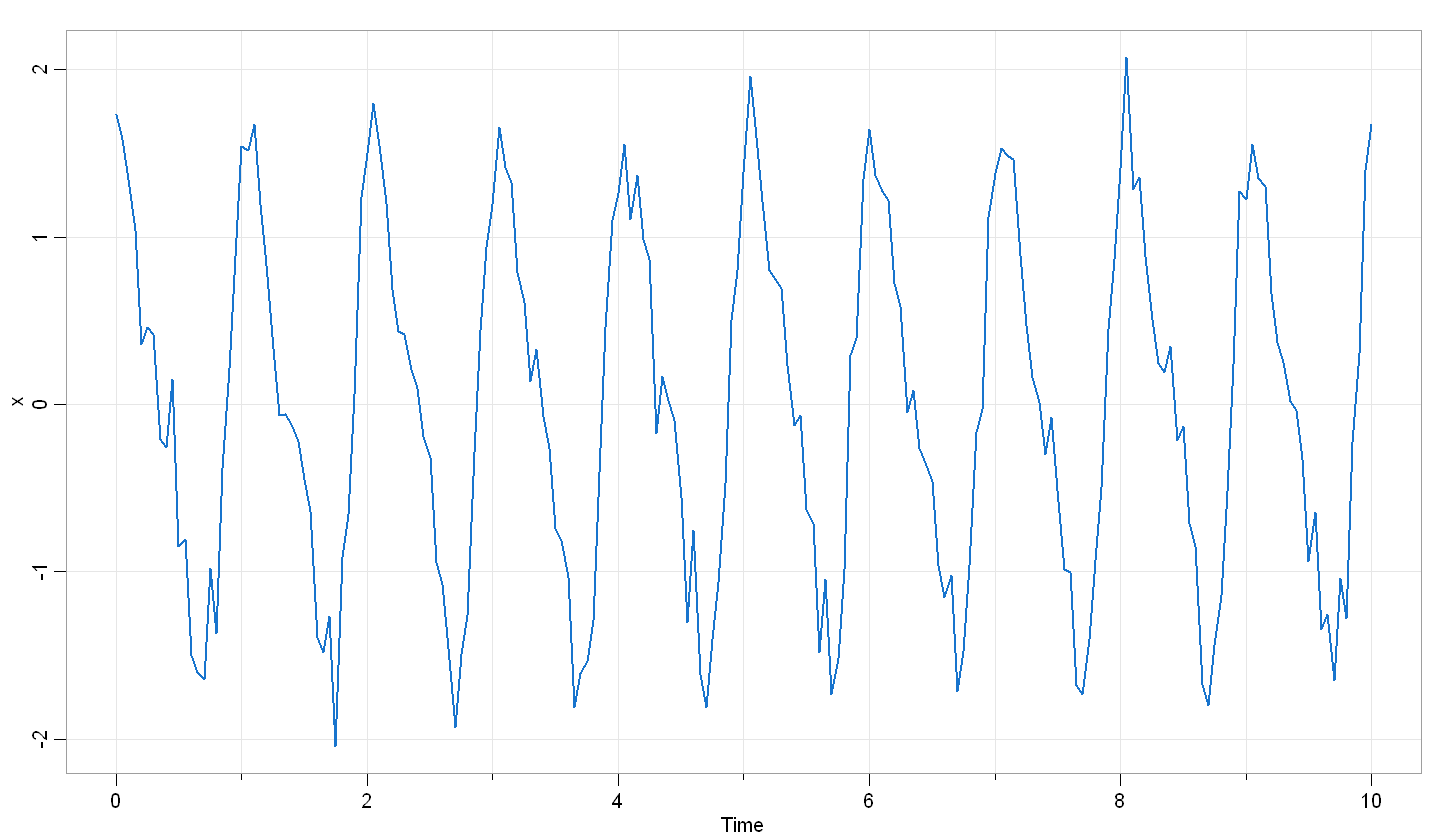

In [7]:
#install.packages("astsa")
library(astsa)
options(repr.plot.width=12, repr.plot.height=7) #ajusta tamaño de graficas

t=seq(0,10, by=0.05)
s = cos(2*pi*t) + sin(2*pi*t) + 0.5*cos(2*pi*2*t)
w=rnorm(length(t),0,0.2)
datos=s+w;

x = ts(datos,start=0,frequency=20)

tsplot(x, lwd=2, col=4)

In [8]:
xt = cos(2*pi*t) + sin(2*pi*t)+ w

fit <- lm(datos ~ xt) # regresion lineal

summary(fit)


Call:
lm(formula = datos ~ xt)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5043 -0.4057  0.1500  0.4007  0.4995 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.002485   0.025124   0.099    0.921    
xt          1.001353   0.025266  39.633   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3562 on 199 degrees of freedom
Multiple R-squared:  0.8876,	Adjusted R-squared:  0.887 
F-statistic:  1571 on 1 and 199 DF,  p-value: < 2.2e-16


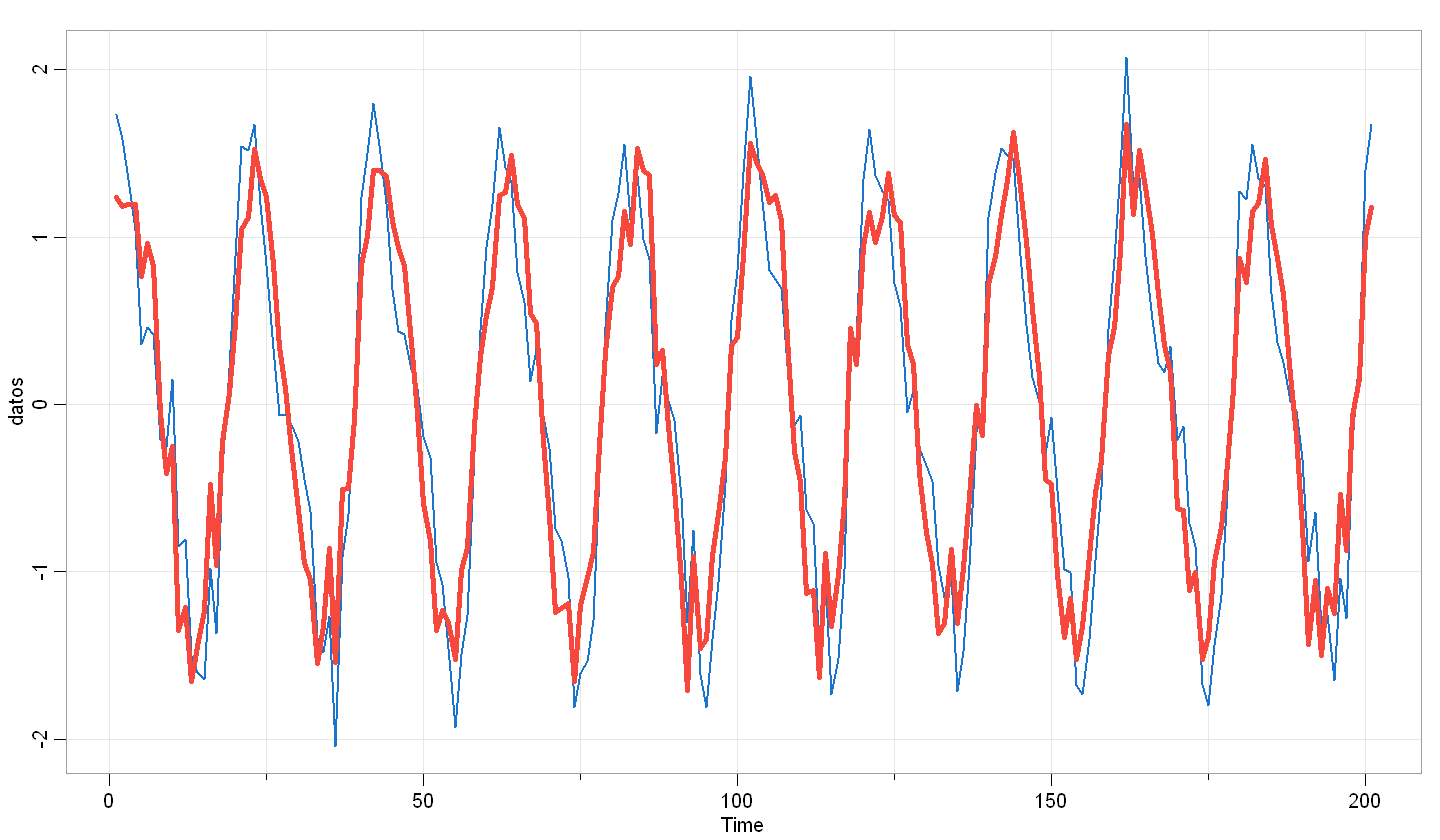

In [9]:
xt_estim = ts(fitted(fit))

tsplot(datos, lwd=2, col=4)
lines(xt_estim, lwd=4, col=2)

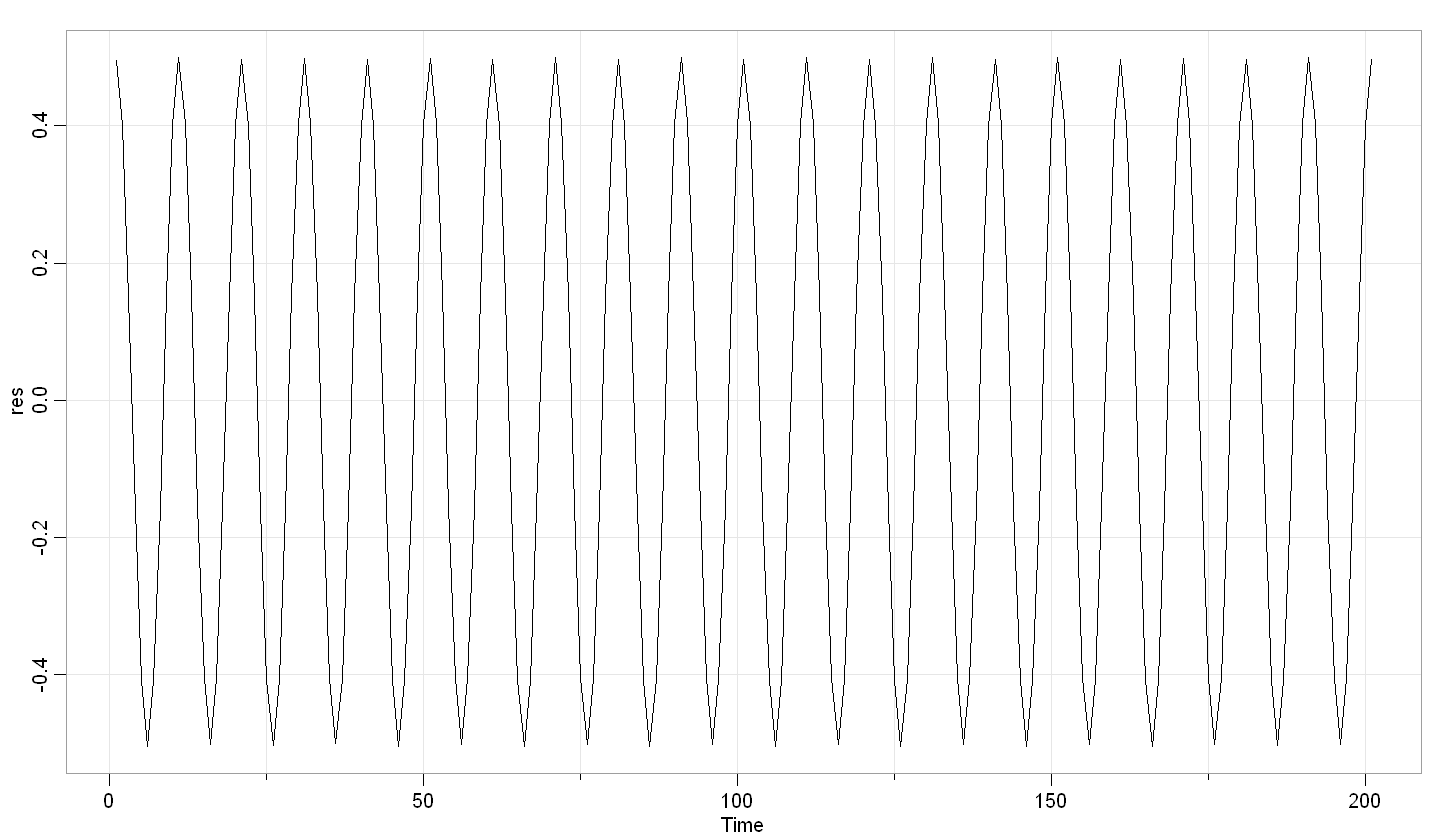

In [10]:
res = residuals(fit)
tsplot(res)

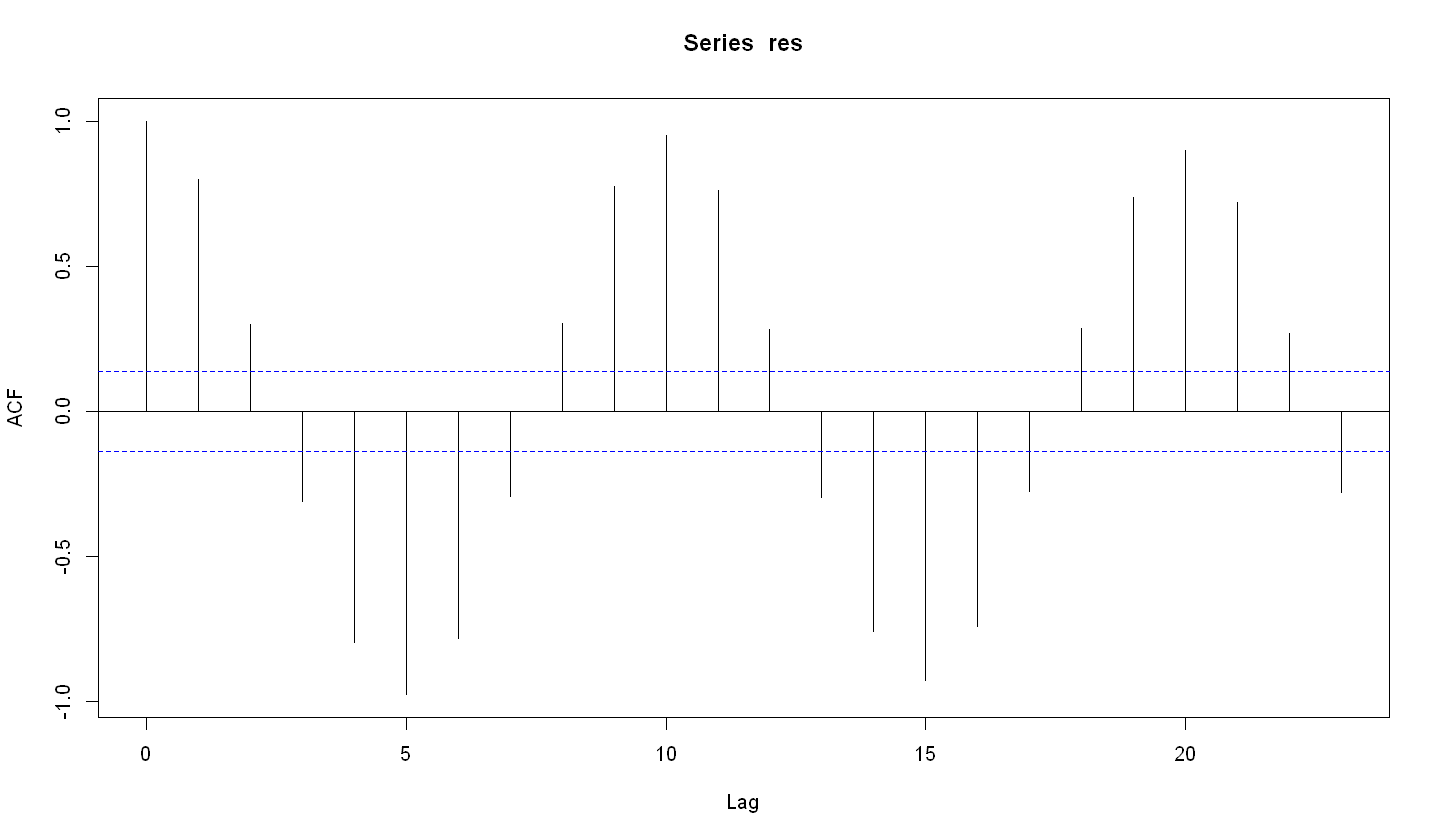

In [11]:
acf(res)

In [12]:
xt2 = cos(2*pi*t) + sin(2*pi*t)+ cos(2*pi*2*t)+ sin(2*pi*2*t) + w

fit2 <- lm(datos ~ xt2) # regresion lineal

summary(fit2)


Call:
lm(formula = datos ~ xt2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2541 -0.3618  0.1342  0.5035  0.8791 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.976e-05  4.143e-02    0.00        1    
xt2         6.240e-01  2.936e-02   21.25   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5874 on 199 degrees of freedom
Multiple R-squared:  0.6942,	Adjusted R-squared:  0.6927 
F-statistic: 451.8 on 1 and 199 DF,  p-value: < 2.2e-16


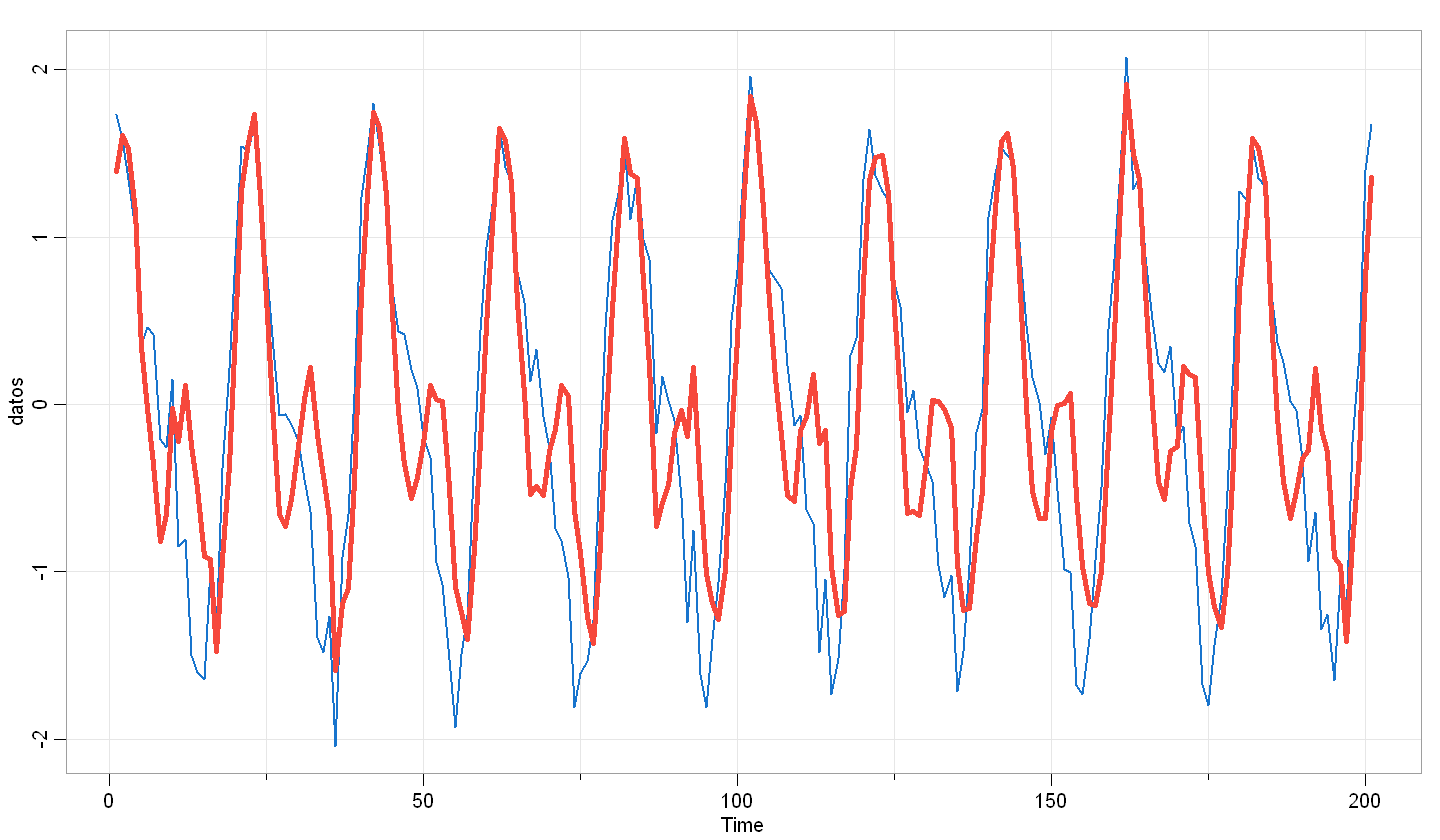

In [13]:
xt2_estim = ts(fitted(fit2))

tsplot(datos, lwd=2, col=4)
lines(xt2_estim, lwd=4, col=2)

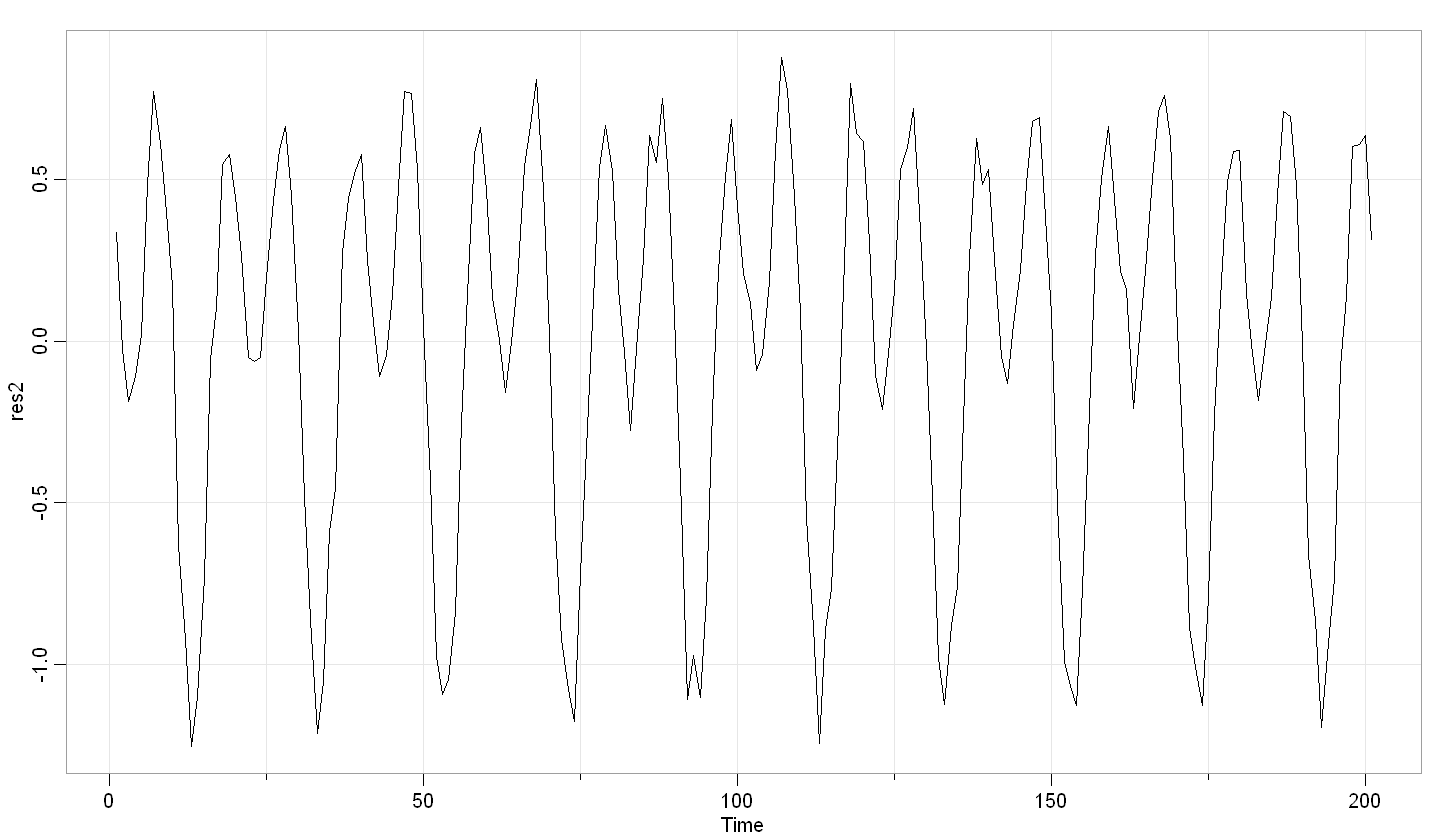

In [14]:
res2 = residuals(fit2)
tsplot(res2)

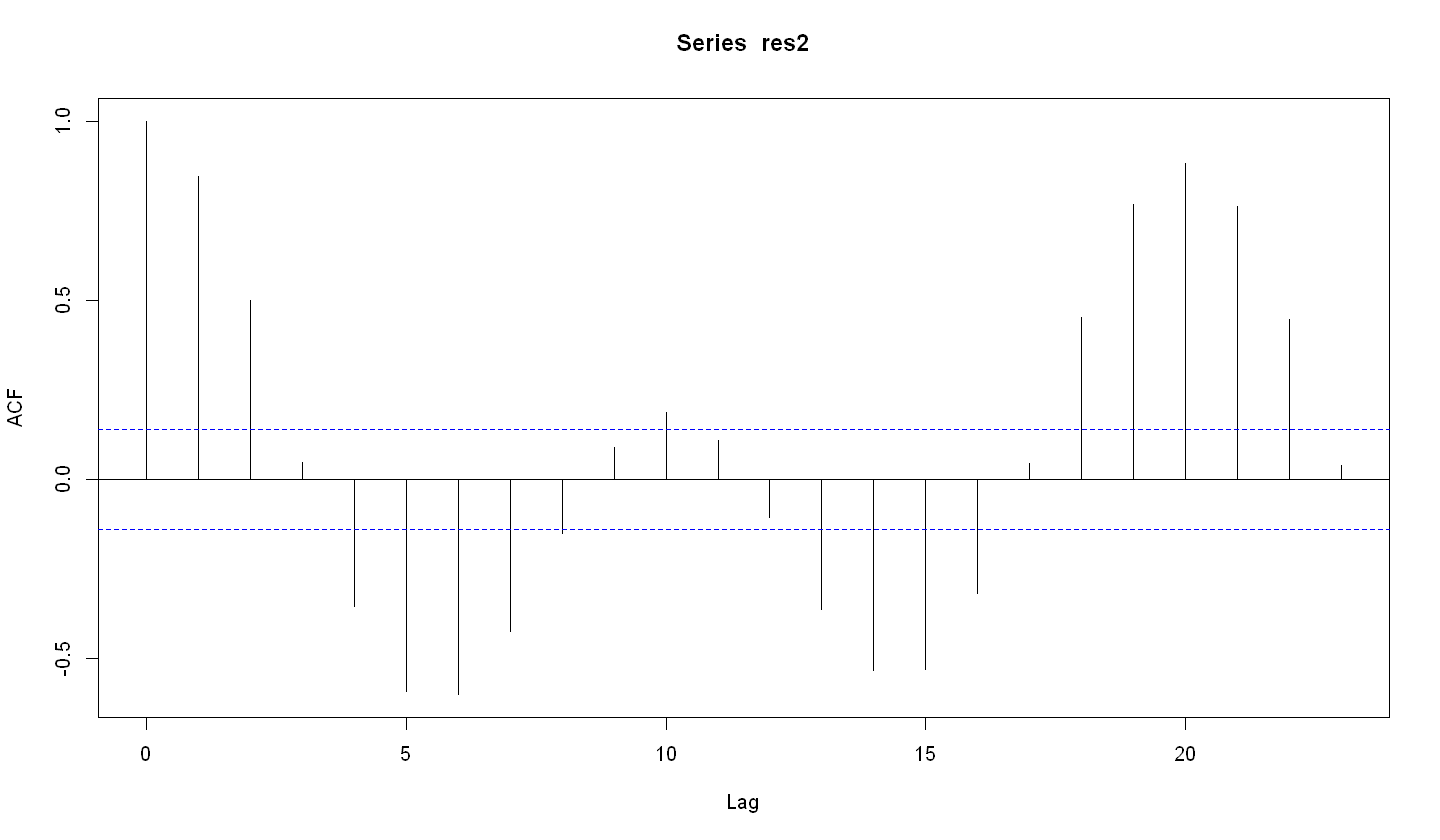

In [15]:
acf(res2)

## Ejercicio 3 [2.9 del libro]

En este ejercicio, se busca explorar la naturaleza periódica de $S_t$, la serie SOI ya analizada.

1. Quitar la tendencia a las serie mediante una regresión lineal en la componente tiempo. ¿Hay una tendencia significativa en la temperatura de superficie?

2. Calcular el periodograma para la serie sin tendencia (residuos) de la parte anterior. Identificar las frecuencias principales (una obvia es la anual). ¿Cuál es el ciclo probable del fenómeno del Niño que refleja el pico más pequeño?


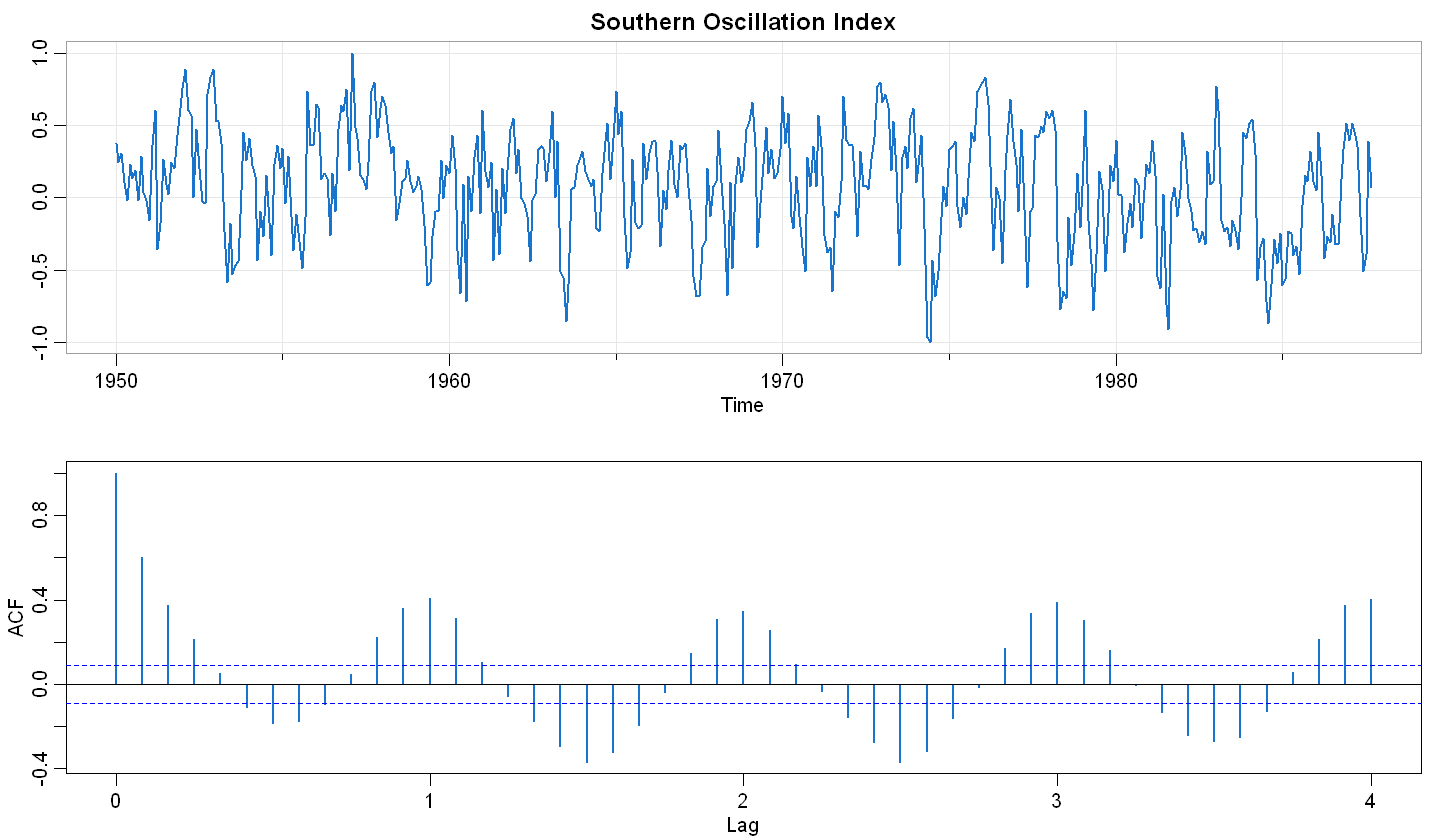

In [16]:
par(mfrow = c(2,1))  # set up the graphics
tsplot(soi, ylab="", main="Southern Oscillation Index", col=4, lwd=2)

acf(soi, 48, main="Southern Oscillation Index", lwd=2, col=4)


Call:
lm(formula = soi ~ trend, na.action = NULL)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.04140 -0.24183  0.01935  0.27727  0.83866 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.21036    0.03524   5.969 4.83e-09 ***
trend       -0.00692    0.00162  -4.272 2.36e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3756 on 451 degrees of freedom
Multiple R-squared:  0.0389,	Adjusted R-squared:  0.03677 
F-statistic: 18.25 on 1 and 451 DF,  p-value: 2.359e-05


[1] -0.9494076

[1] -0.9221501

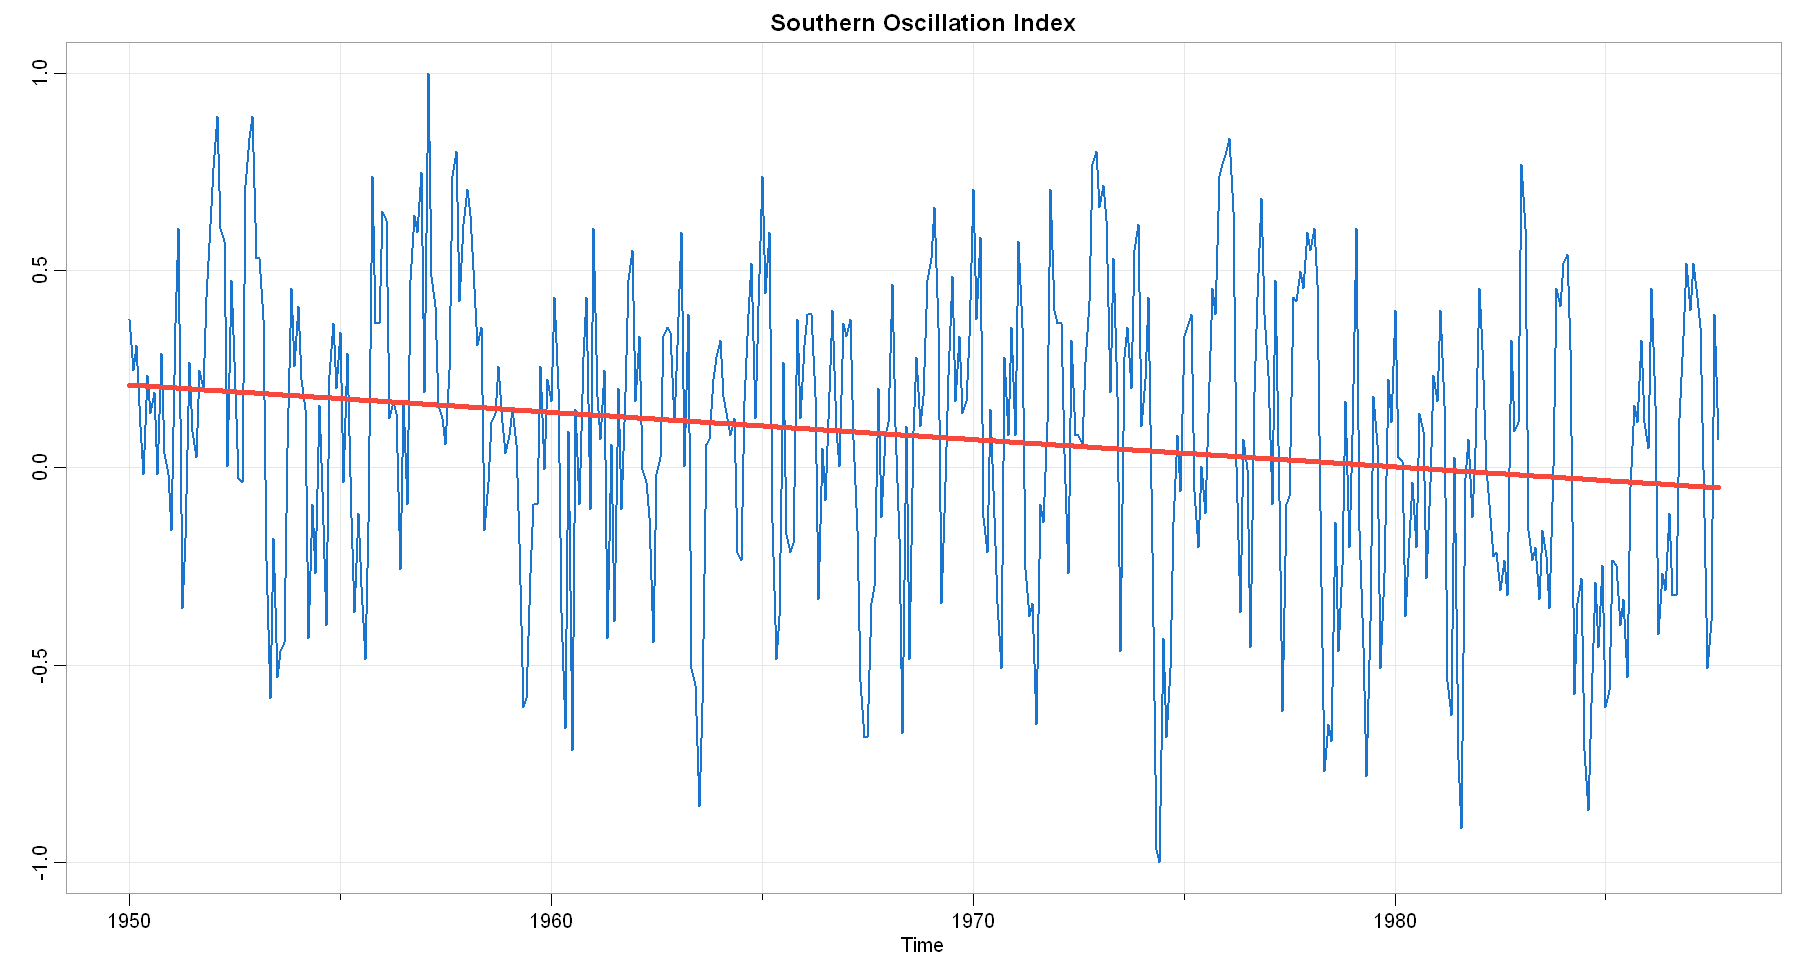

In [17]:
options(repr.plot.width=15, repr.plot.height=8) #ajusta tamaño de graficas


trend = time(soi)-1950       # time

fit = lm(soi ~ trend, na.action=NULL)
            
summary(fit)       # regression results

num = length(soi)                                         # sample size
AIC(fit)/num - log(2*pi)                                # AIC 
BIC(fit)/num - log(2*pi)                                # BIC 

tsplot(soi, ylab="", main="Southern Oscillation Index", col=4, lwd=2)
prediction = ts(fitted(fit), start=1950, freq=12)
lines(prediction, col=2, lwd=4)

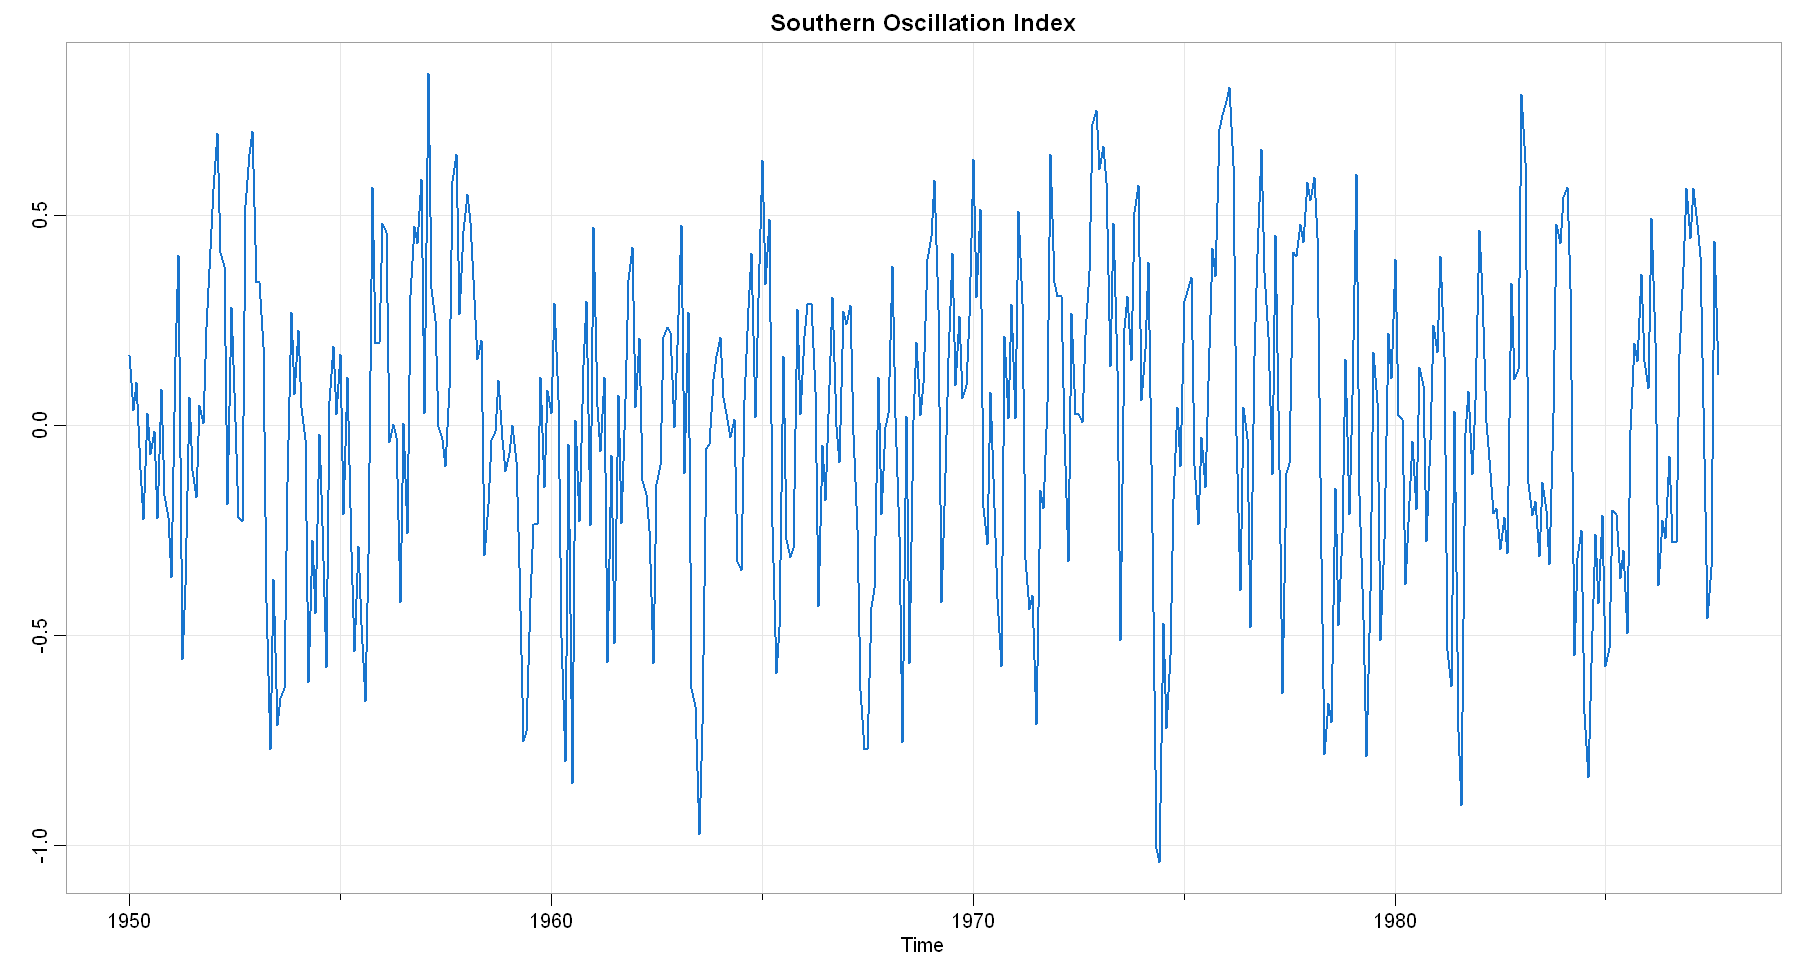

In [18]:
s = as.numeric(soi)
s = s-prediction

tsplot(s, ylab="", main="Southern Oscillation Index", col=4, lwd=2)

[1] 0.2913907

[1] 0.1324503

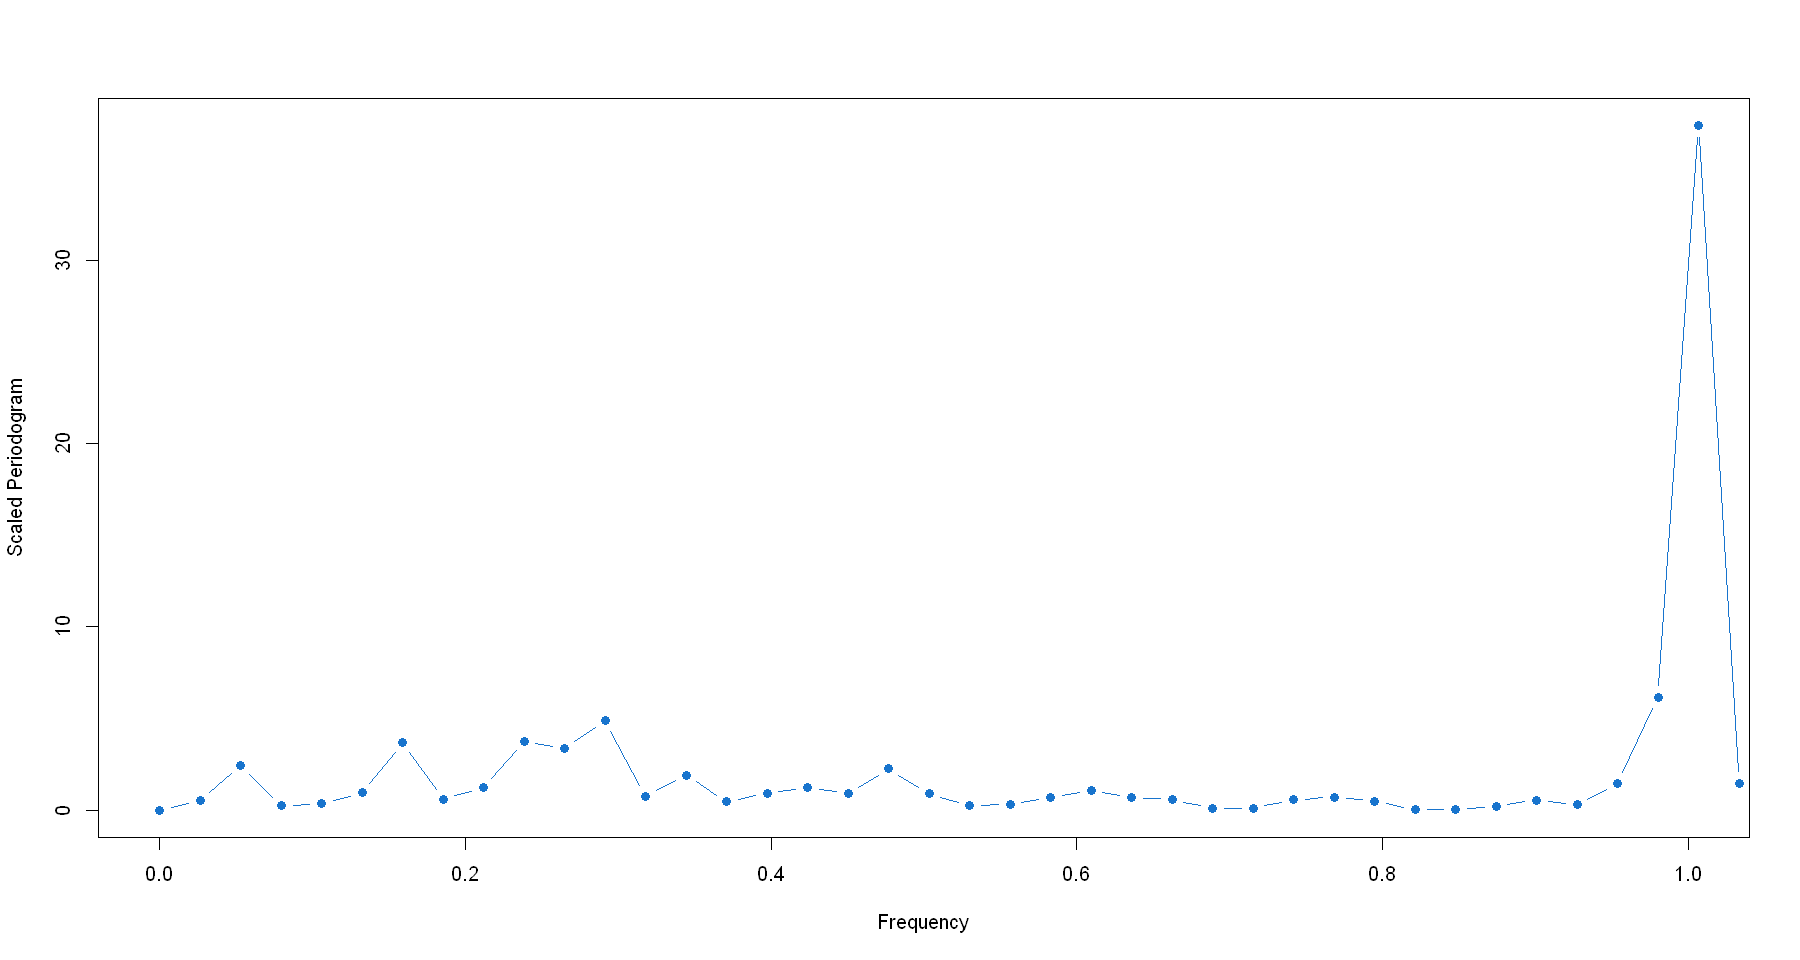

In [19]:
n=length(s)

P = 4/n*abs(fft(s))^2 
#I = abs(fft(s))^2/n # the periodogram
#I=I[1:floor(n/2)]
P=P[1:floor(n/2)]#me quedo con las frecuencias posibles
f = (0:(n/2-1))/n*12 ##El *12 es para llevarlo a la frecuencia original de la serie.
plot(f,P,  type="b", xlab="Frequency", ylab="Scaled Periodogram", xlim=c(0, 1), col=4, lwd=1, pch=19)

f[12]
f[6]


Call:
lm(formula = s ~ 0 + cos(2 * pi * t) + sin(2 * pi * t) + cos(2 * 
    pi * 0.291 * t) + sin(2 * pi * 0.291 * t) + cos(2 * pi * 
    0.132 * t), na.action = NULL)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.74422 -0.20759  0.00933  0.23319  0.72367 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
cos(2 * pi * t)          0.30666    0.01917  15.994  < 2e-16 ***
sin(2 * pi * t)         -0.09470    0.01922  -4.928 1.17e-06 ***
cos(2 * pi * 0.291 * t) -0.04771    0.01921  -2.484   0.0134 *  
sin(2 * pi * 0.291 * t) -0.09073    0.01918  -4.730 3.02e-06 ***
cos(2 * pi * 0.132 * t)  0.04856    0.01923   2.525   0.0119 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2889 on 448 degrees of freedom
Multiple R-squared:  0.4126,	Adjusted R-squared:  0.406 
F-statistic: 62.93 on 5 and 448 DF,  p-value: < 2.2e-16


[1] -1.468168

[1] -1.413653

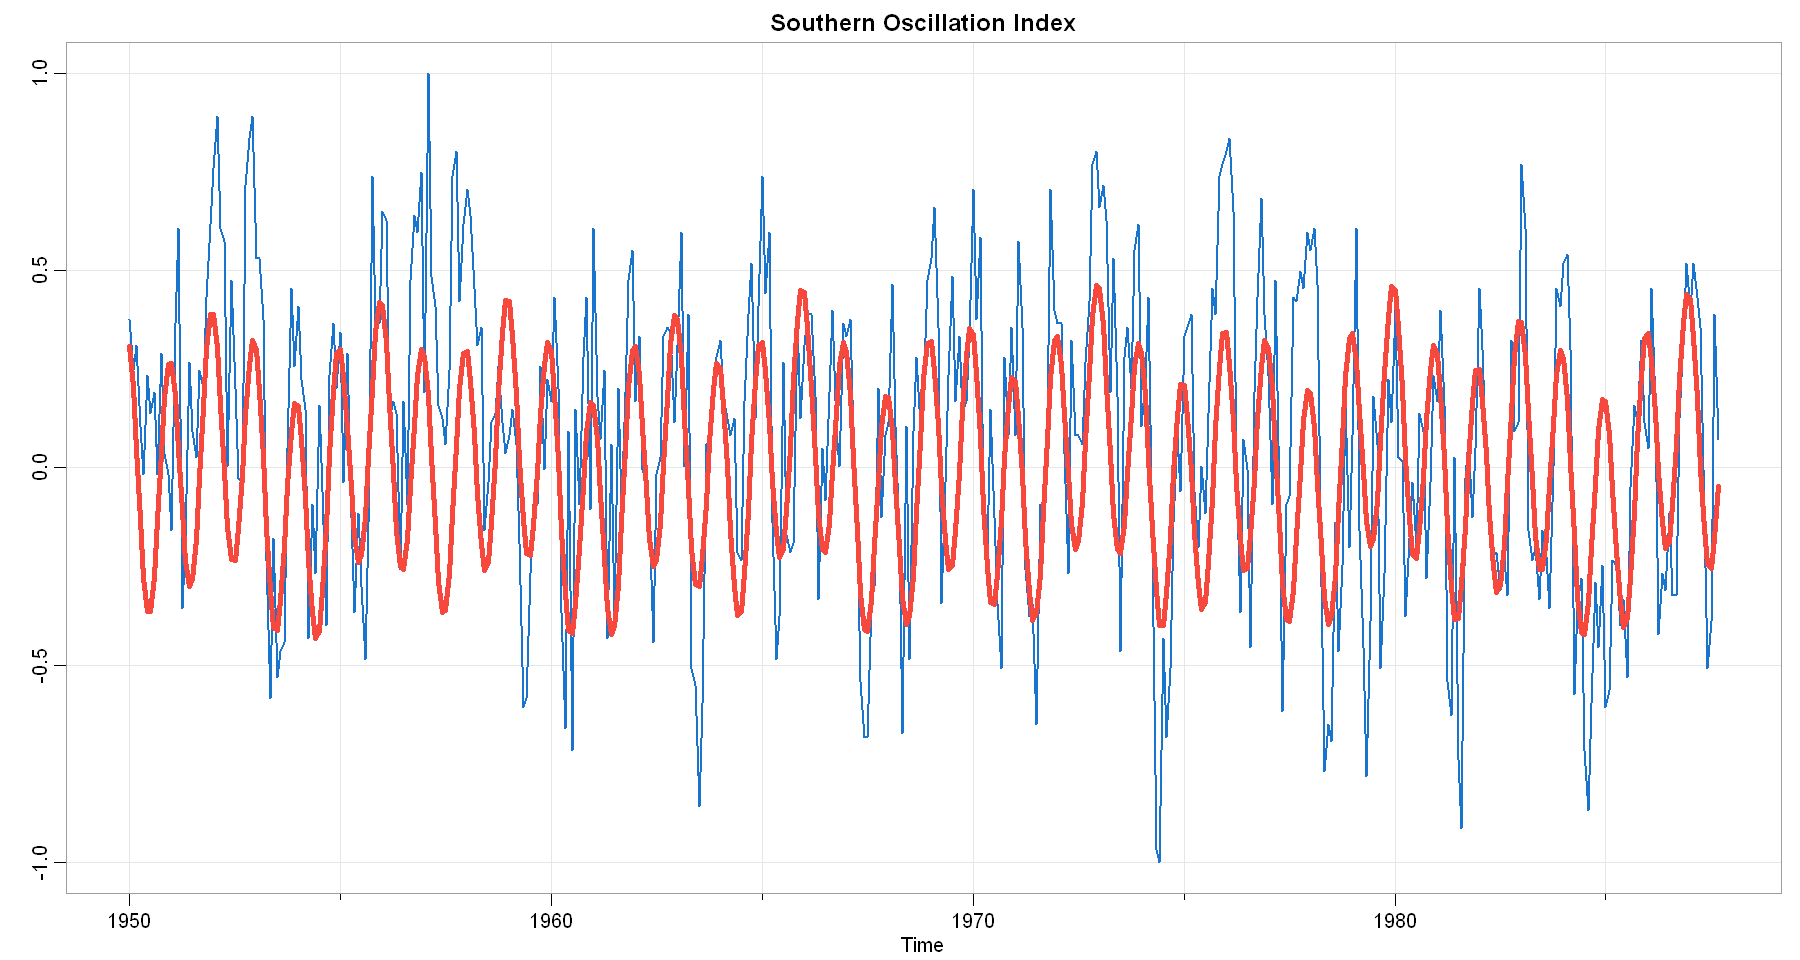

In [20]:
# regresion lineal
trend = time(soi)-1950       # time
t=trend
fit2 = lm(s ~ 0 + cos(2*pi*t) + sin(2*pi*t)+ cos(2*pi*0.291*t) + sin(2*pi*0.291*t) + cos(2*pi*0.132*t) , na.action=NULL)
            
summary(fit2)       # regression results

num = length(s)                                         # sample size
AIC(fit2)/num - log(2*pi)                                # AIC 
BIC(fit2)/num - log(2*pi)                                # BIC 

tsplot(soi, ylab="", main="Southern Oscillation Index", col=4, lwd=2)
prediction2 = ts(fitted(fit2), start=1950, freq=12)
lines(prediction2, col=2, lwd=4)

## Ejercicio 4 [2.10 del libro]

Considere las dos series semanales `oil` (precio del petróleo) and `gas` (precio del combustible). La primera está en dólares por barril, la segunda en centavos por galón.

1. Graficar ambas en una misma gráfica. ¿Cuál de los modelos ya vistos se asemeja más? ¿Son estacionarias?

2. En economía, muchas veces la información se encuentra en el porcentaje de cambio de la serie (retorno o tasa de crecimiento). Argumente que la transformación $y_t= \log(x_t) - \log(x_{t-1})$ puede usarse para obtener el retorno.

3. Aplicar la transformación a las series anteriores, volver a graficar y analizar la autocorrelación de las mismas.

4. Graficar la correlación cruzada de las series transformadas. Los valores pequeños pero significativos donde gas adelanta a oil pueden ser considerados "realimentación" entre ellas.

5. Realizar nubes de puntos para las series laggeadas, con hasta 3 semanas de diferencia.

6. Hay estudios que afirman que los precios de combustible responden más rápido a las subidas del petróleo que a las bajadas. Para explorar esto hagamos una regresión con lags simple. 

Sean $G_t$ y $O_t$ las series transformadas de gas y oil respectivamente. Ajuste una regresión:

$$G_t = \alpha_1 + \alpha_2 I_t + \beta_1 O_t + \beta_2 O_{t−1} + w t,$$

siendo $I_t = 1$ si $O_t \geqslant 0$ y $0$ si no ($I_t$ representa si oil está creciendo). Sugerencia: construir $I$ como `indi = ifelse(poil < 0, 0, 1)`

Analizar y discutir los resultados.

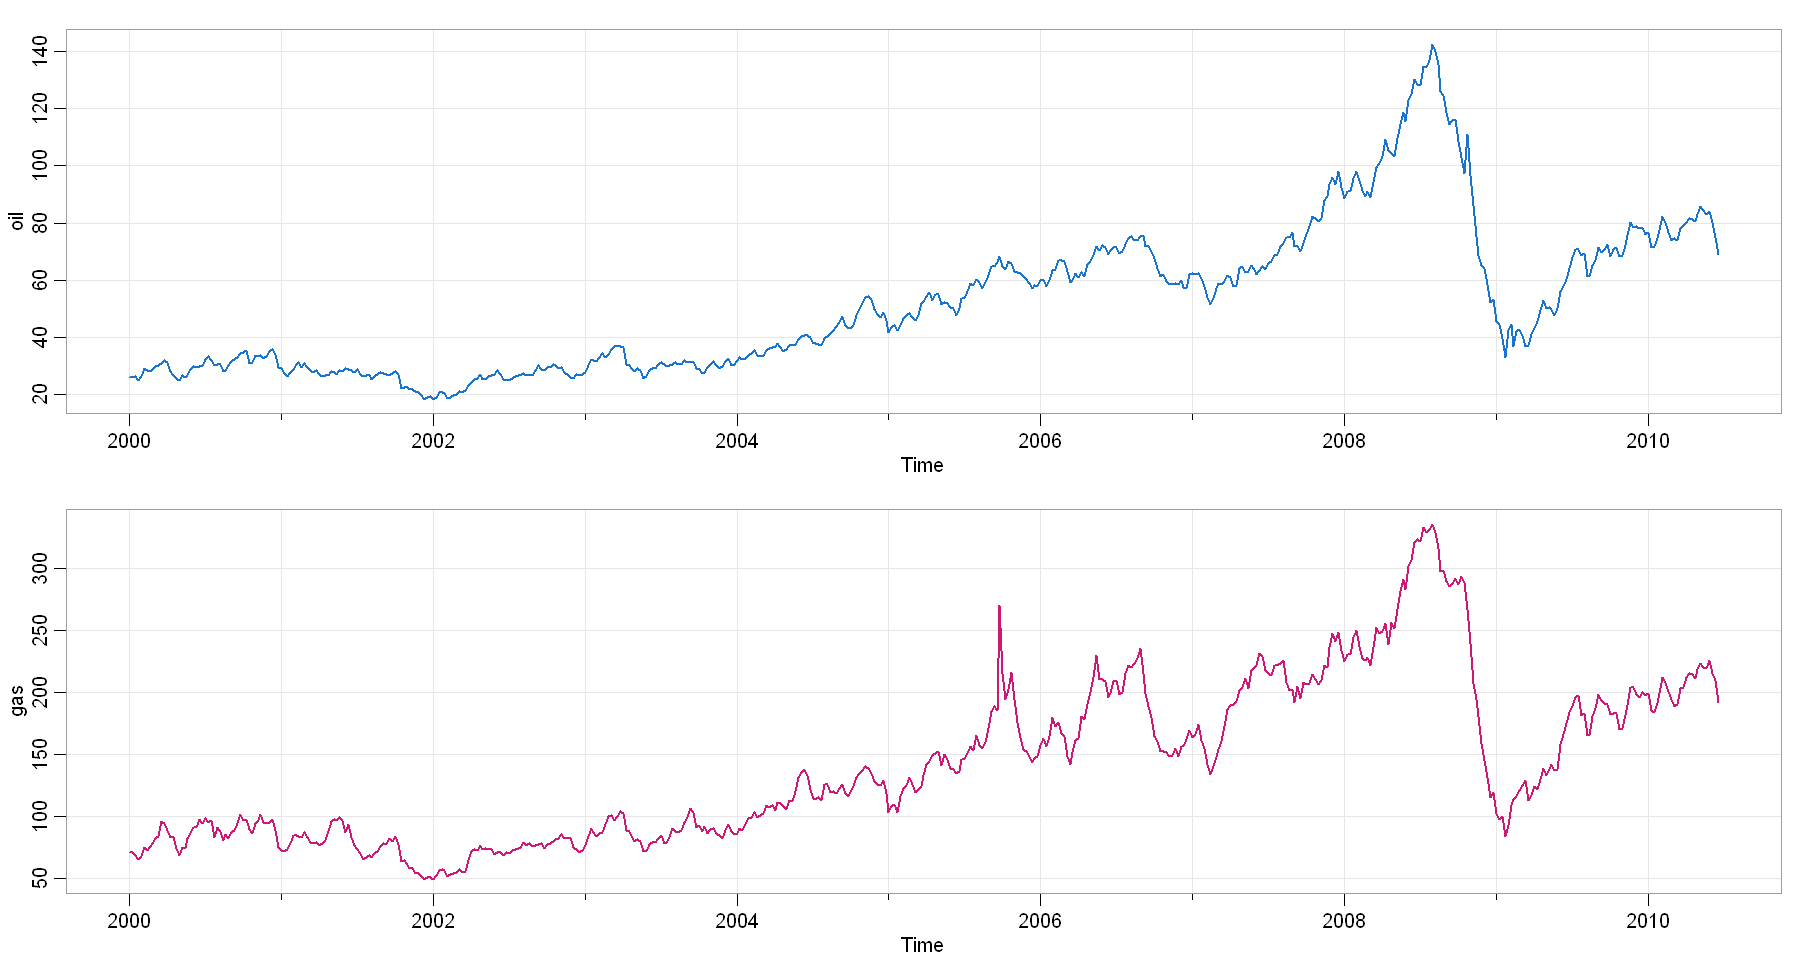

In [21]:
par(mfrow=c(2,1))
tsplot(oil, col=4, lwd=2)
tsplot(gas, col=6, lwd=2)

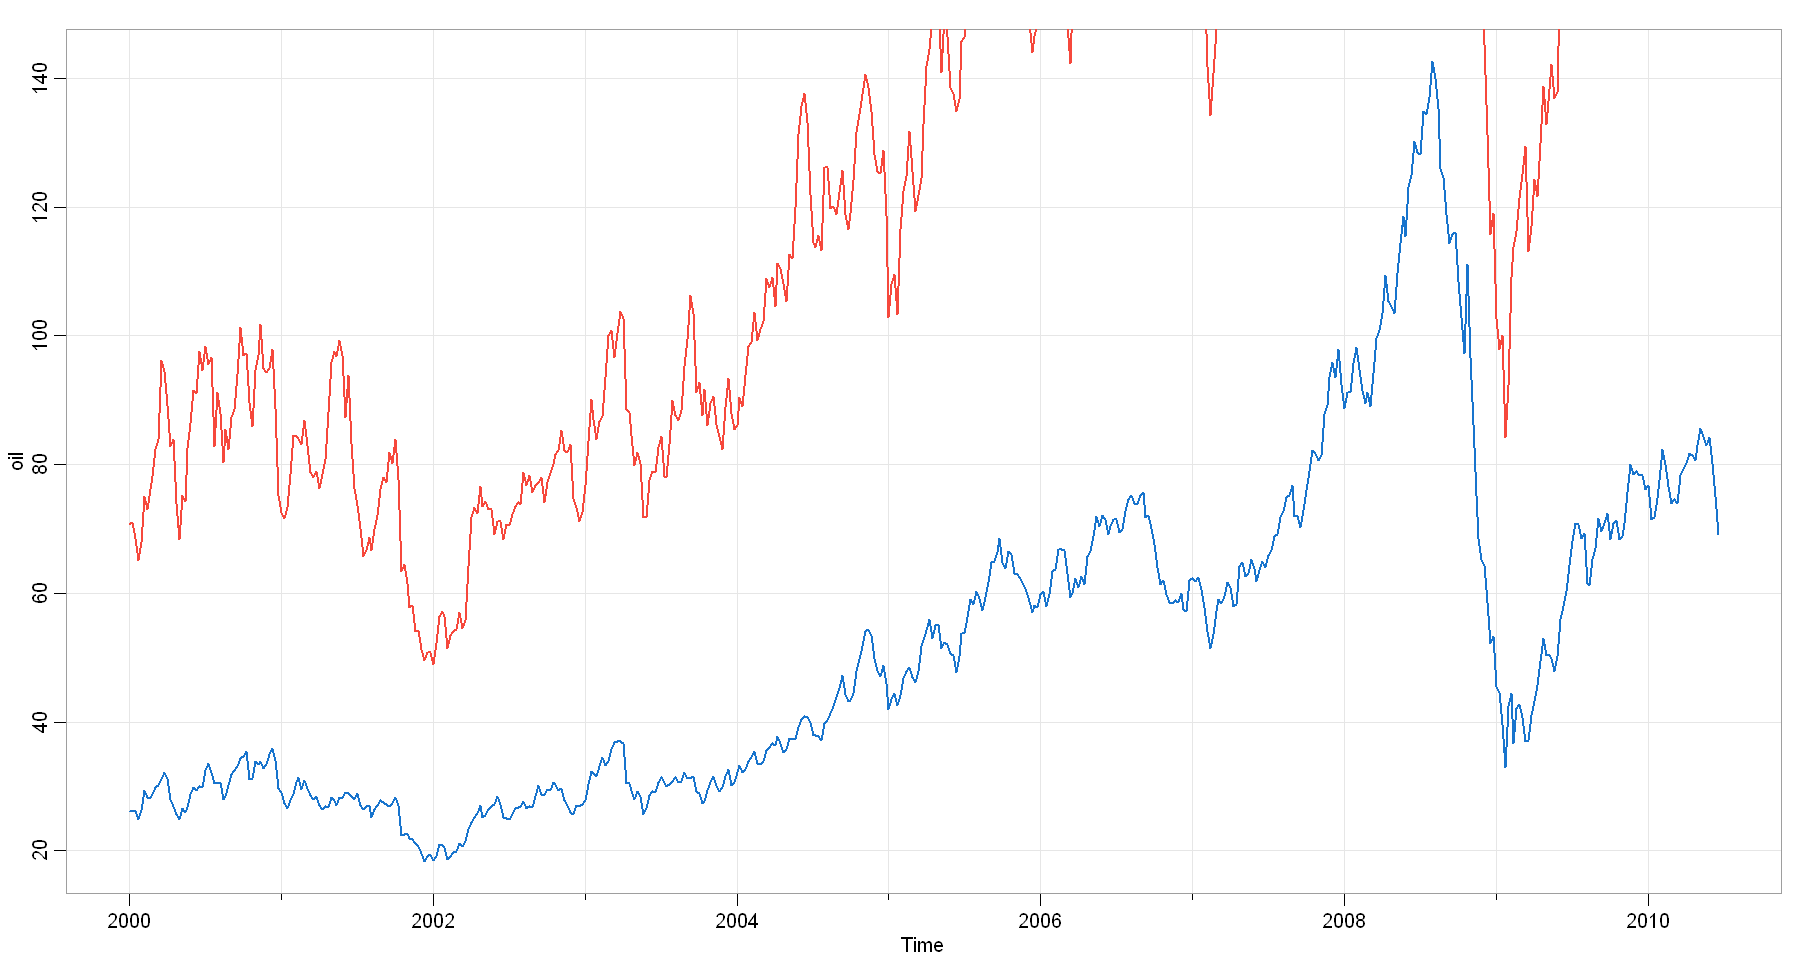

In [22]:
options(repr.plot.width=15, repr.plot.height=8)
#transformo el resultado en una serie
oil = oil
gas = gas
tsplot(oil, col=4, lwd=2)
lines(gas, col=2, lwd=2)

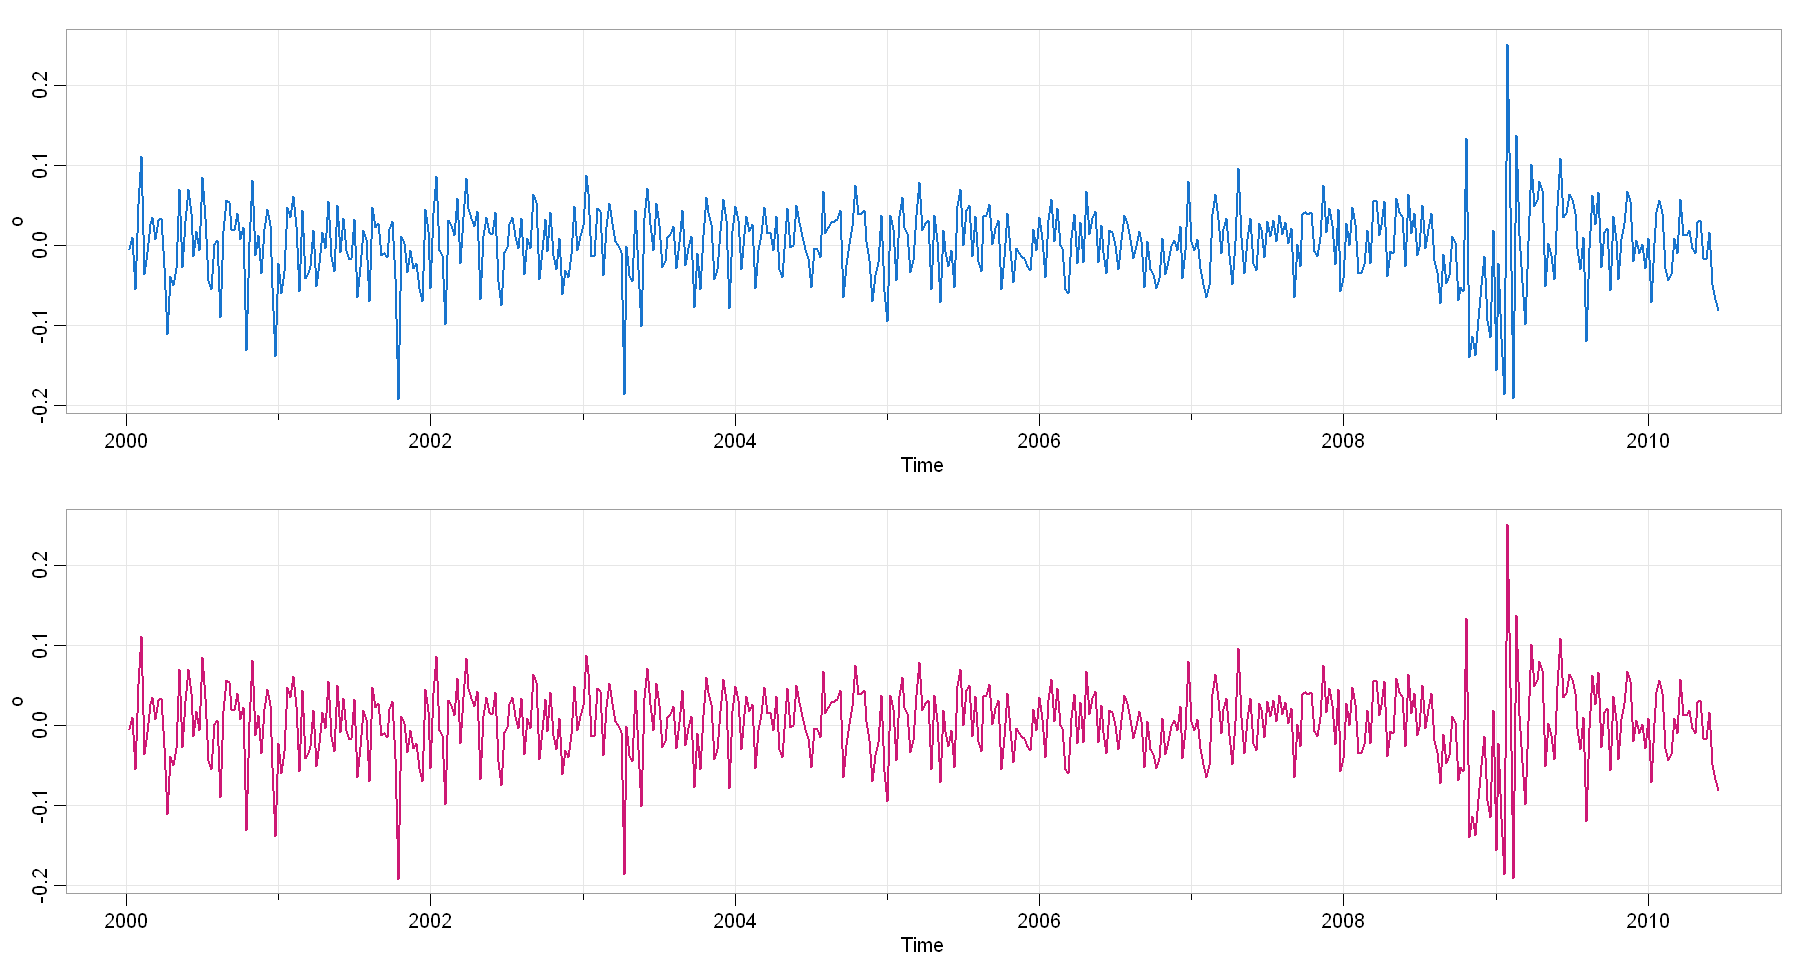

In [23]:
o = diff(log(oil)) # convertimos las series
g = diff(log(gas)) #diff es lo  mismo que tomar la serie, hacer el logaritmo y restar
par(mfrow = c(2,1))
tsplot(o, col = 4, lwd =2)
tsplot(o, col = 6, lwd =2)

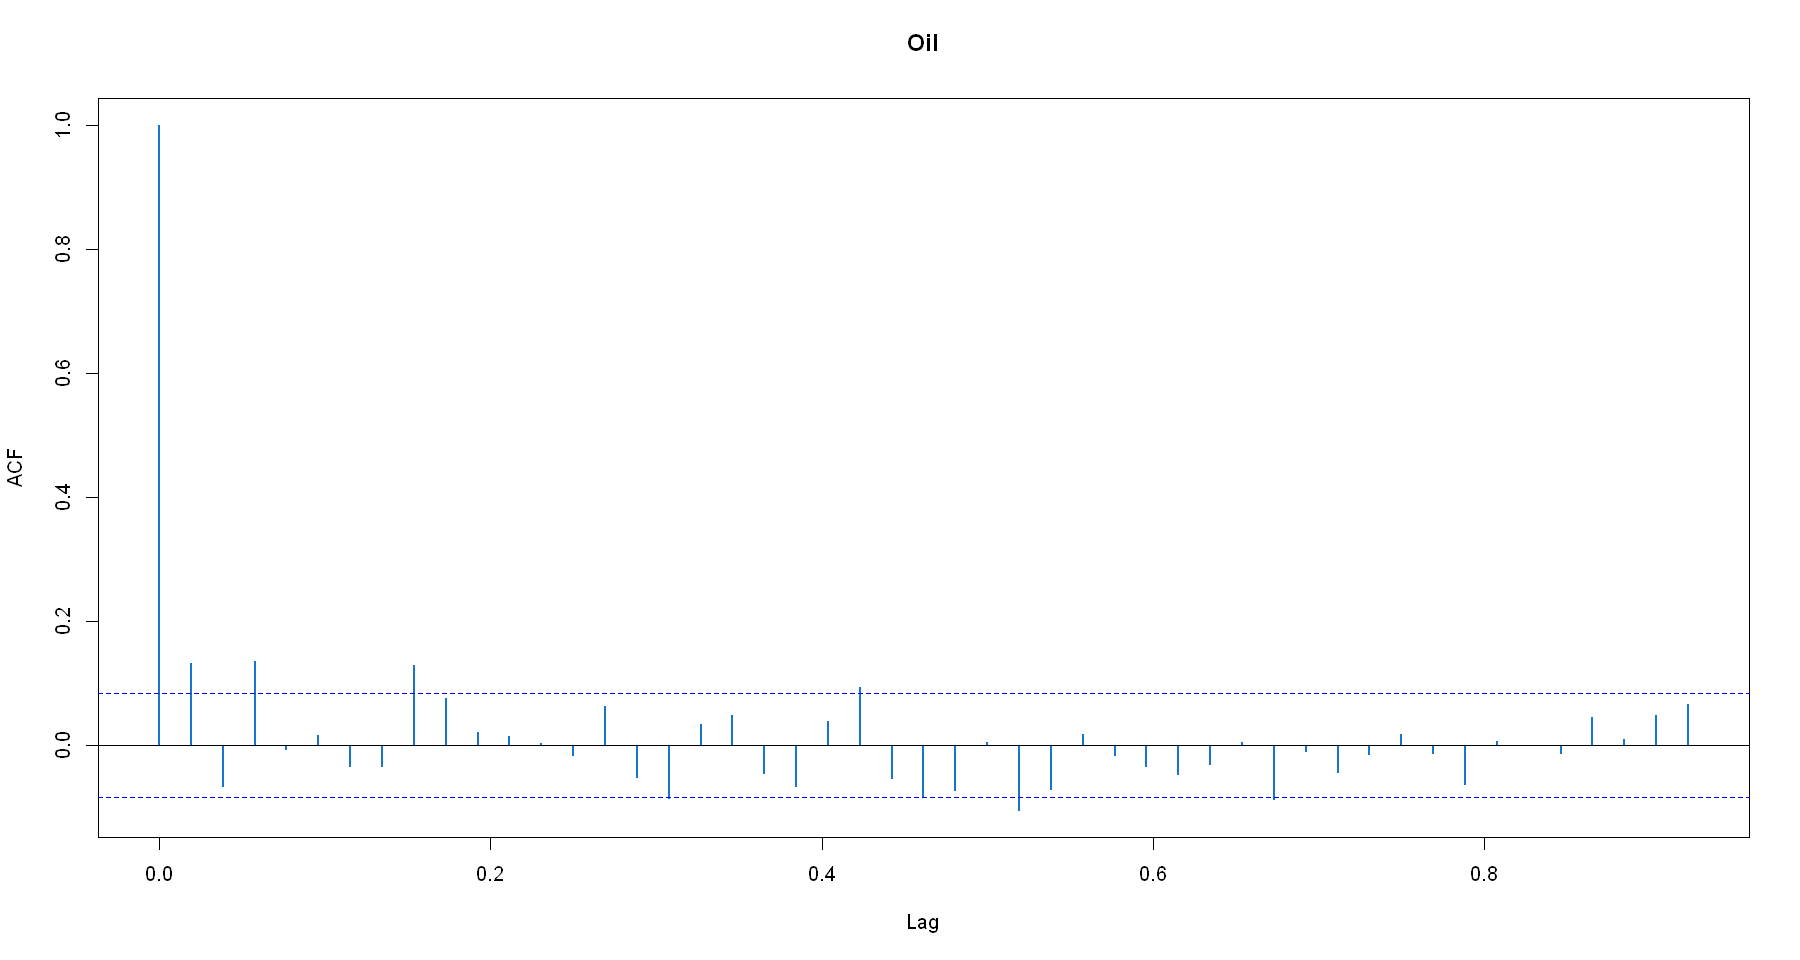

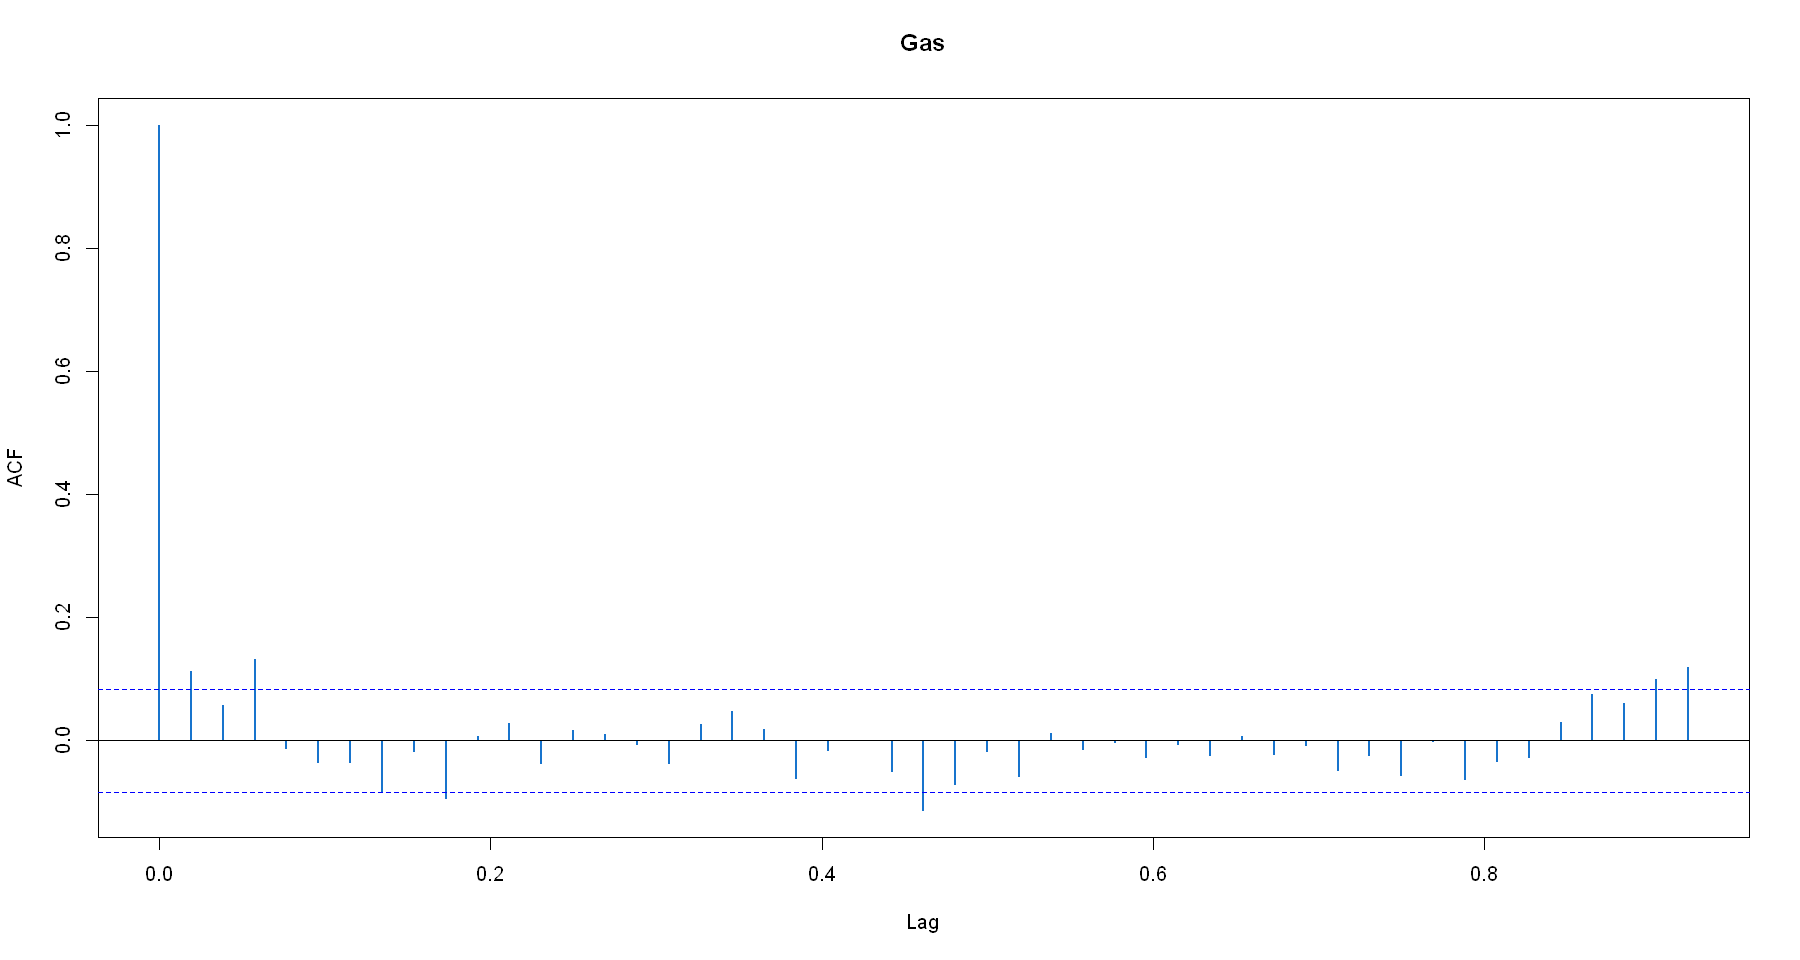

In [24]:
acf(o, 48, main="Oil", col=4, lwd=2)
acf(g, 48, main="Gas", col=4, lwd=2)

En este caso vemos que las series no están auto correlacionadas, porque los valores se encuentran en su mayoría dentro de las bandas del error.

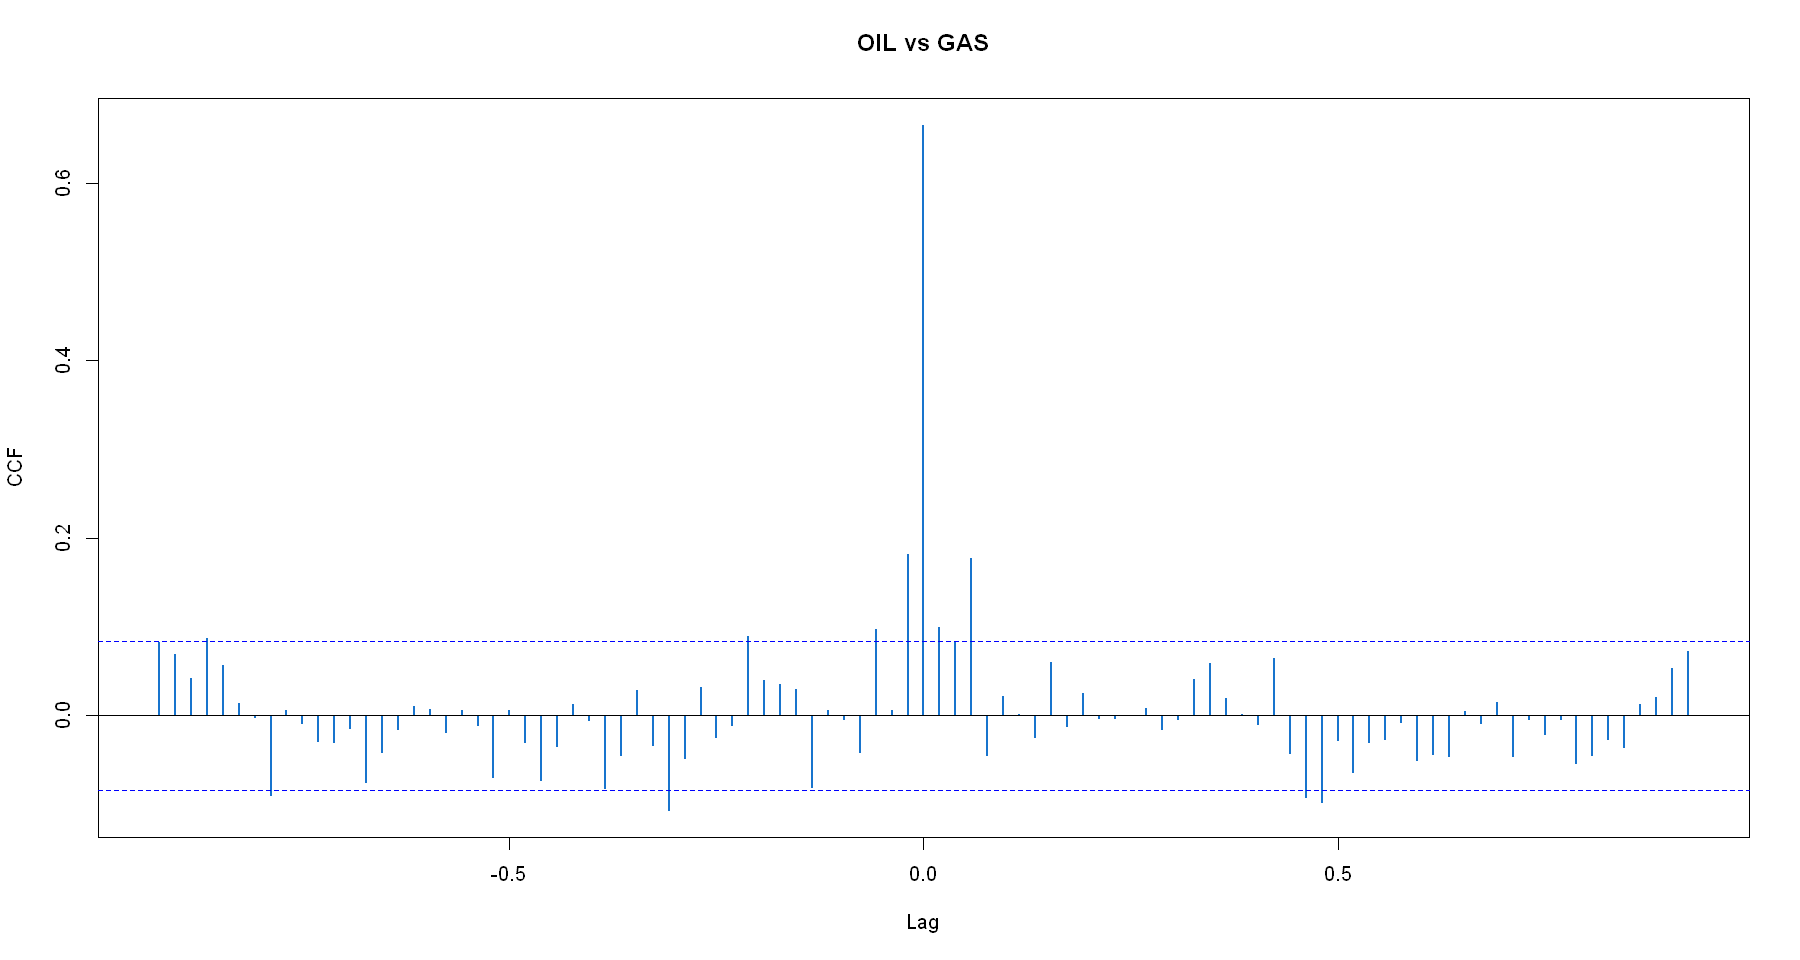

In [25]:
options(repr.plot.width=15, repr.plot.height=8)
ccf(o, g, 48, main="OIL vs GAS", ylab="CCF", col=4, lwd=2)

Vemos que las series tiene la mejor correlación en el tiempo t, por lo tanto podemos decir que están en fase y no es necesario aplicar un LAG.

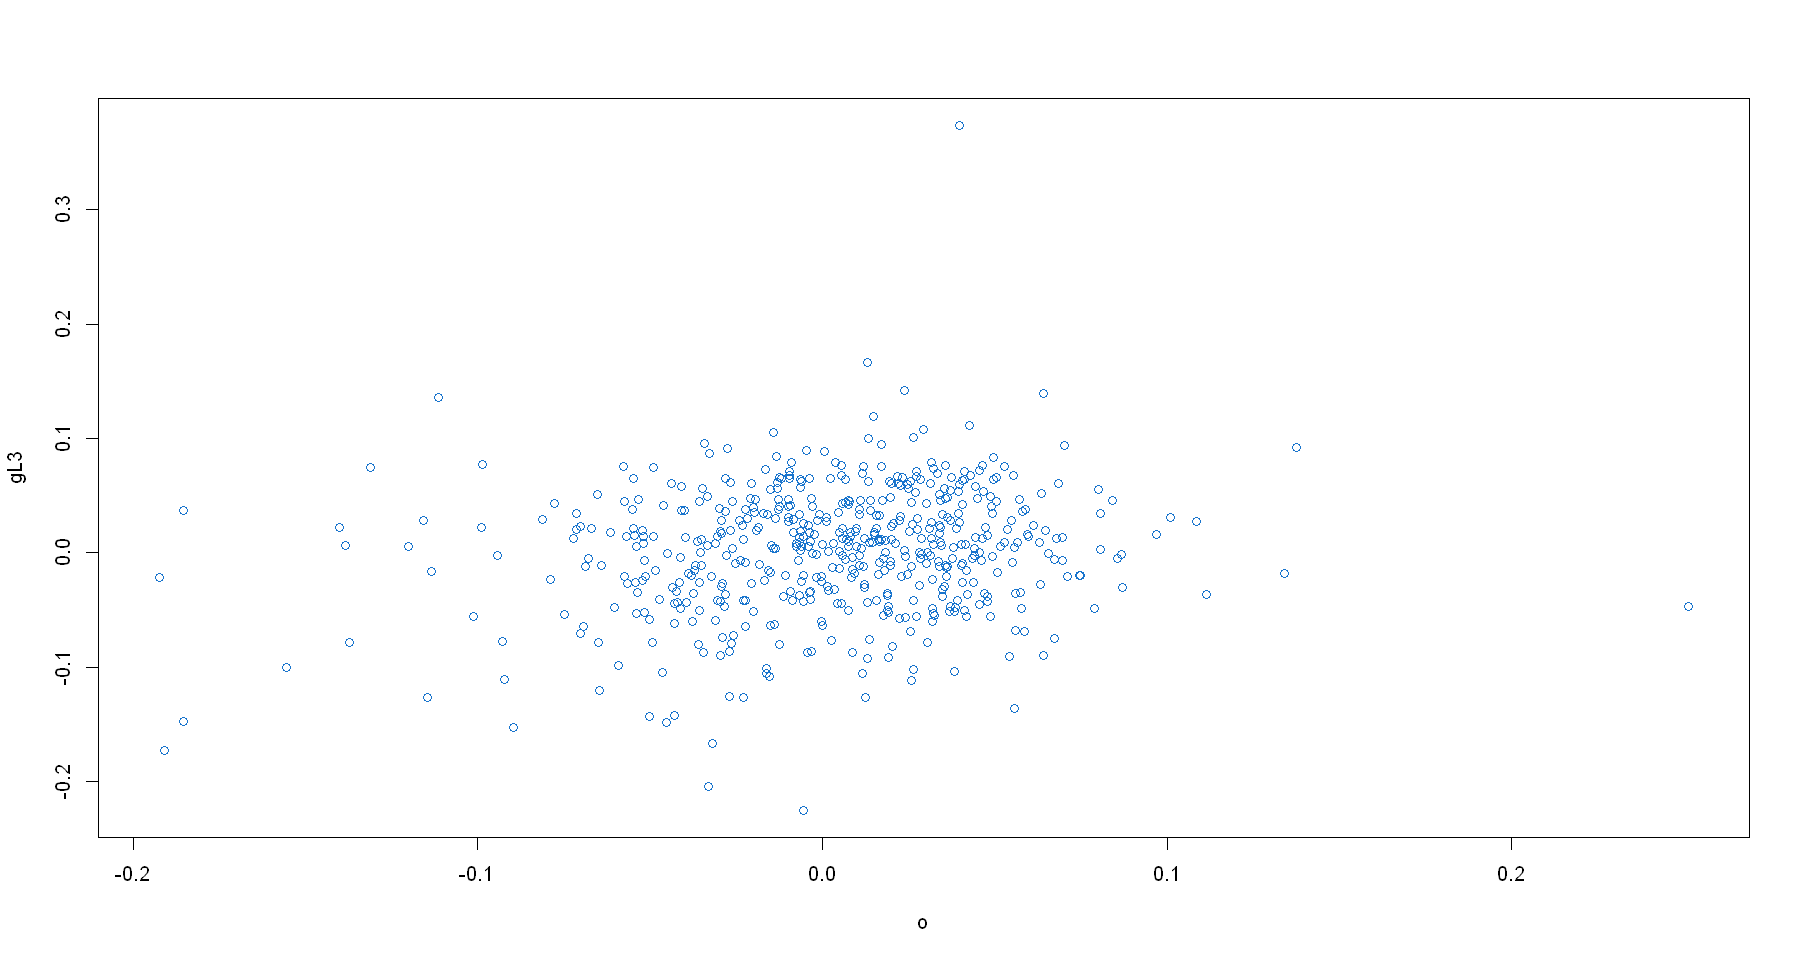

In [26]:
oil = ts.intersect(o, gL3=lag(g,-3), dframe=TRUE)

plot(oil, col=4)

In [27]:
indi = ifelse(o < 0, 0, 1)
mess = ts.intersect(g, o, oL = lag(o,-1), indi)
summary(fit <- lm(g~ o + oL + indi, data=mess))


Call:
lm(formula = g ~ o + oL + indi, data = mess)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18451 -0.02161 -0.00038  0.02176  0.34342 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.006445   0.003464  -1.860  0.06338 .  
o            0.683127   0.058369  11.704  < 2e-16 ***
oL           0.111927   0.038554   2.903  0.00385 ** 
indi         0.012368   0.005516   2.242  0.02534 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04169 on 539 degrees of freedom
Multiple R-squared:  0.4563,	Adjusted R-squared:  0.4532 
F-statistic: 150.8 on 3 and 539 DF,  p-value: < 2.2e-16


En base a estos resultados vemos la regresión es significativa explicando un 45% de la variabza y con un p-value: < 2.2e-16 que se obtiene en el coeficiente del valor del barril de petróleo. 

## Ejercicio 5

Analizar el uso de la función `nls` para hacer una ajuste de *regresión logística* a la serie de poblaciones de Australia entre 1778 y 2005 que se brinda a continuación.

La función logística de parámetros $A$, $b$ y $t_0$ tiene la siguiente expresión:

$$f(t;A,b,t_0) = \frac{A}{1+e^{-b(t-t_0)}}$$

Los parámetros representan:
* $A$: el valor asintótico.
* $b$: la velocidad de transición de $0$ a $A$.
* $t_0$: el tiempo de transición (donde vale $A/2$).

In [28]:
growth <- c(859, 645, 2056, 2873, 3264, 3514, 3579, 3466, 4100, 4344, 
    4588, 5088, 5217, 5945, 7014, 7238, 7598, 7707, 7910, 8794, 10263, 11560, 
    11566, 11875, 12630, 13957, 14086, 15063, 17553, 21192, 25859, 31472, 33543, 
    35492, 37364, 40632, 48072, 52505, 53882, 56300, 58197, 61934, 70039, 75981, 
    83937, 98095, 105556, 113354, 125120, 134488, 151868, 169939, 190408, 220968, 
    240984, 250848, 264287, 279148, 293249, 308797, 332328, 373362, 405356, 
    437665, 513796, 600992, 694917, 793260, 876729, 970287, 1050828, 1097305, 
    1145585, 1168149, 1206918, 1259292, 1325183, 1390043, 1443955, 1483848, 
    1539552, 1592157, 1647756, 1700888, 1742847, 1794520, 1849392, 1898223, 
    1958679, 2031130, 2092164, 2162343, 2231531, 2306736, 2388082, 2505736, 
    2605725, 2694518, 2788050, 2881362, 2981677, 3062477, 3151355, 3240985, 
    3305753, 3361895, 3426760, 3491621, 3553098, 3617783, 3664715, 3715988, 
    3765339, 3824913, 3875318, 3916592, 3974150, 4032977, 4091485, 4161722, 
    4232278, 4323960, 4425083, 4573786, 4746589, 4893741, 4971778, 4969457, 
    4917949, 4982063, 5080912, 5303574, 5411297, 5510944, 5637286, 5755986, 
    5882002, 6003027, 6124020, 6251016, 6355770, 6436213, 6500751, 6552606, 
    6603785, 6656695, 6707247, 6755662, 6810413, 6871492, 6935909, 7004912, 
    7077586, 7143598, 7201096, 7269658, 7347024, 7430197, 7517981, 7637963, 
    7792465, 8045570, 8307481, 8527907, 8739569, 8902686, 9089936, 9311825, 
    9530871, 9744087, 9947358, 10160968, 10391920, 10642654, 10846059, 11055482, 
    11280429, 11505408, 11704843, 11912253, 12145582, 12407217, 12663469, 13198380, 
    13409288, 13614344, 13831978, 13968881, 14110107, 14281533, 14430830, 14602481, 
    14807370, 15054117, 15288891, 15483496, 15677282, 15900566, 16138769, 16394641, 
    16687082, 16936723, 17169768, 17387023, 17581284, 17759999, 17951481, 18196054, 
    18420320, 18609115, 18814276, 19038338, 19272644, 19533972, 19770963, 20011882, 
    20252132, 20544064)
years <- c(1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 
    1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 
    1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 
    1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 
    1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 
    1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 
    1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 
    1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 
    1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 
    1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 
    1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 
    1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 
    1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 
    1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 
    1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 
    1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 
    1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 
    1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 
    2001, 2002, 2003, 2004, 2005)

population <- data.frame(growth, years)

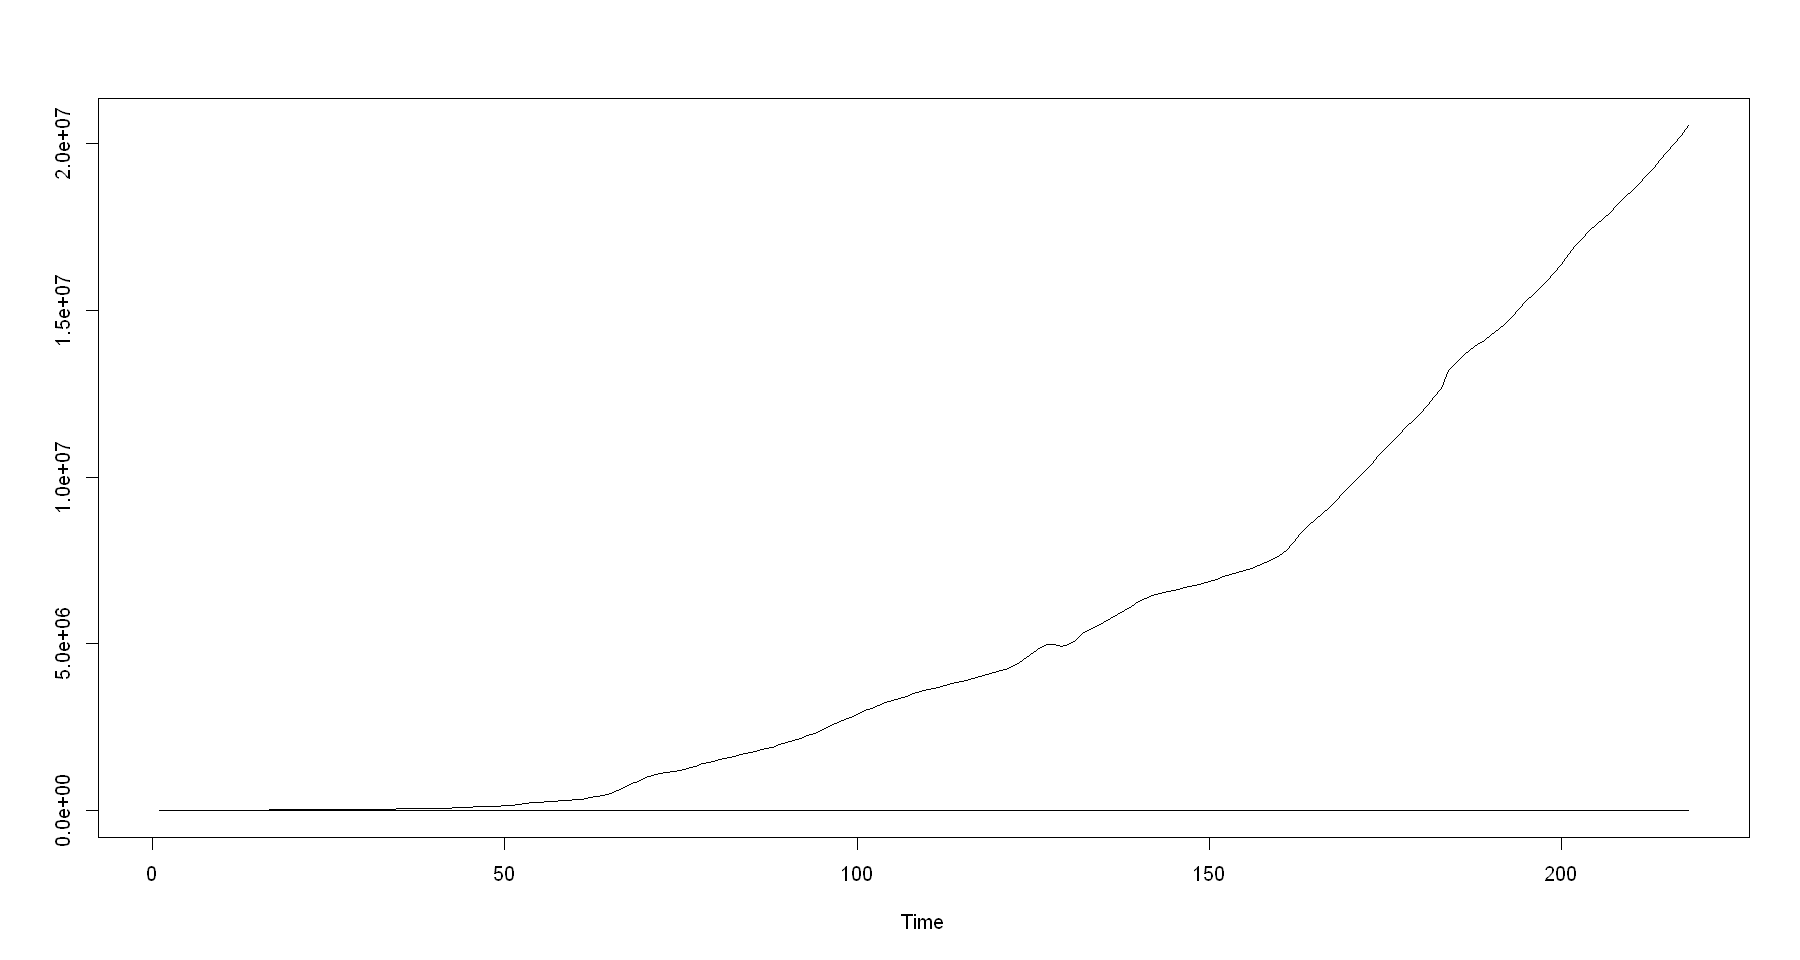

In [29]:
ts.plot(population)

In [30]:
t =(population$years)

fit <- nls(population$growth~a/(1+exp(-b*(t-c))),start=list(a=20544064*2, b=0.02, c=1990))

summary(fit)


Formula: population$growth ~ a/(1 + exp(-b * (t - c)))

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
a 3.879e+07  1.869e+06   20.76   <2e-16 ***
b 2.390e-02  4.668e-04   51.19   <2e-16 ***
c 2.000e+03  3.743e+00  534.47   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 414500 on 215 degrees of freedom

Number of iterations to convergence: 7 
Achieved convergence tolerance: 3.145e-06


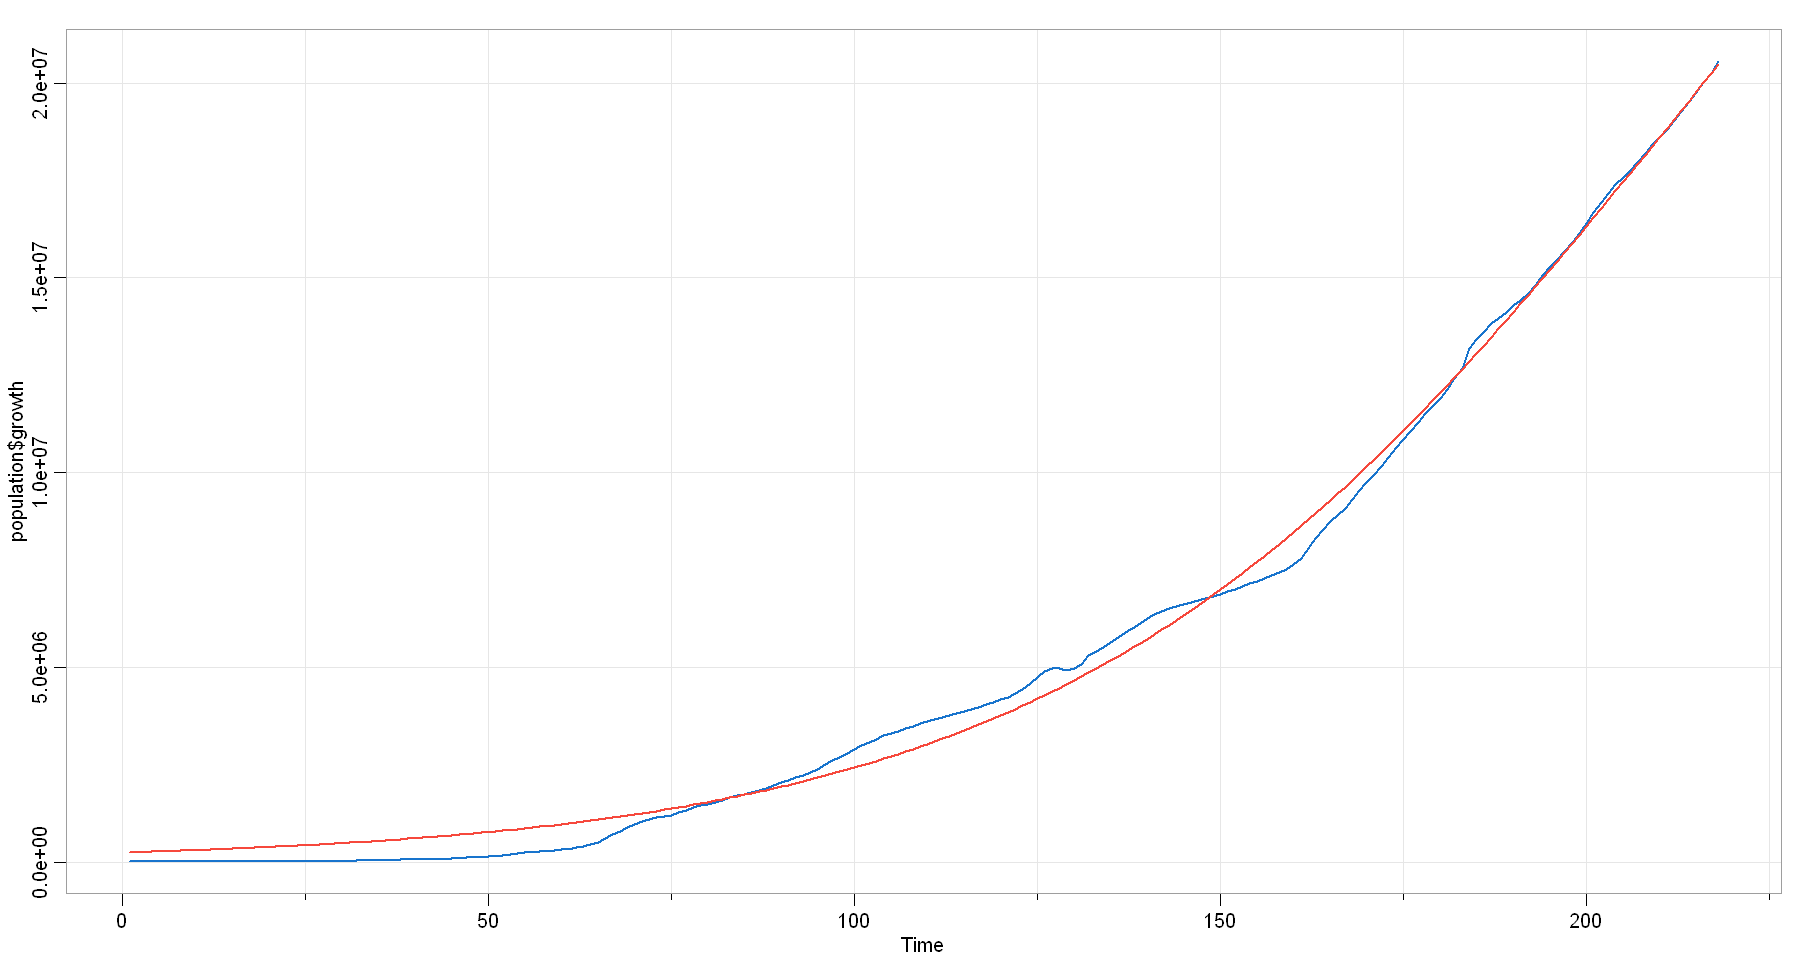

In [31]:
predictions = ts(fitted(fit))
tsplot(population$growth, col=4, lwd=2)
lines(predictions, col=2, lwd=2)